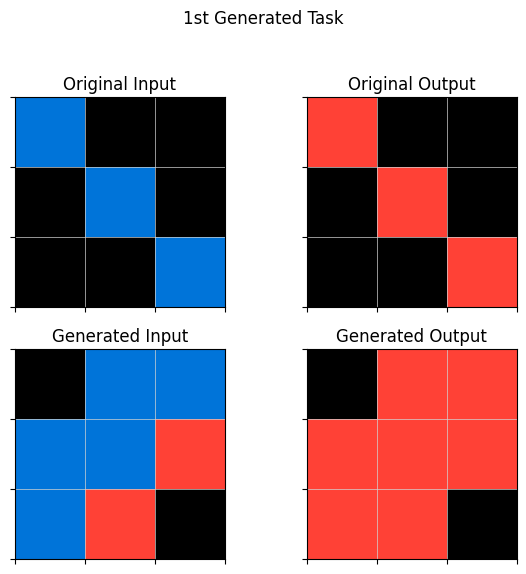

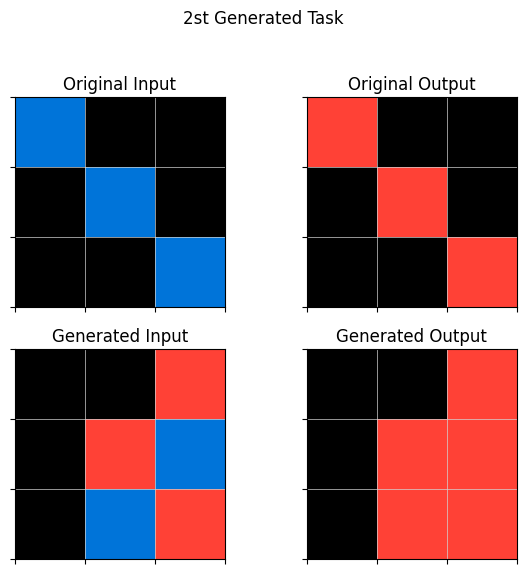

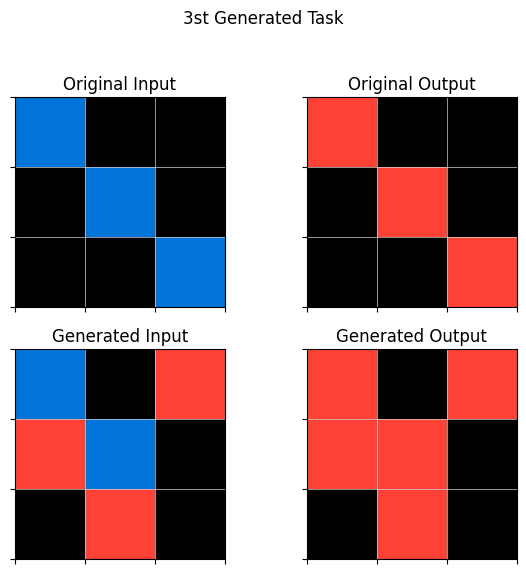

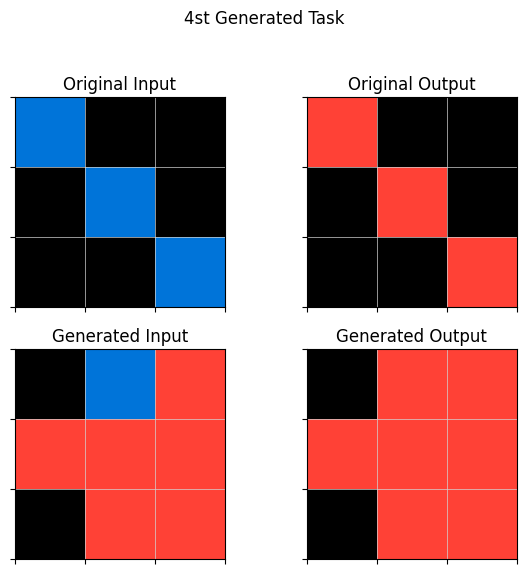

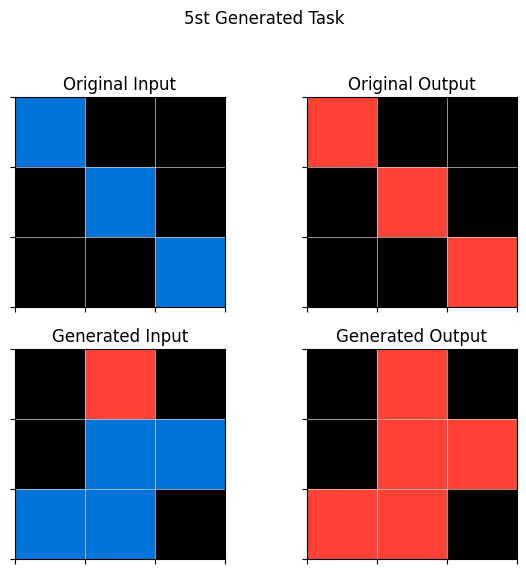

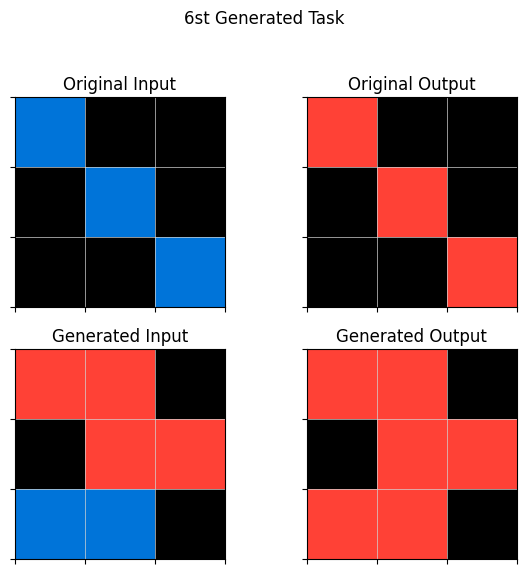

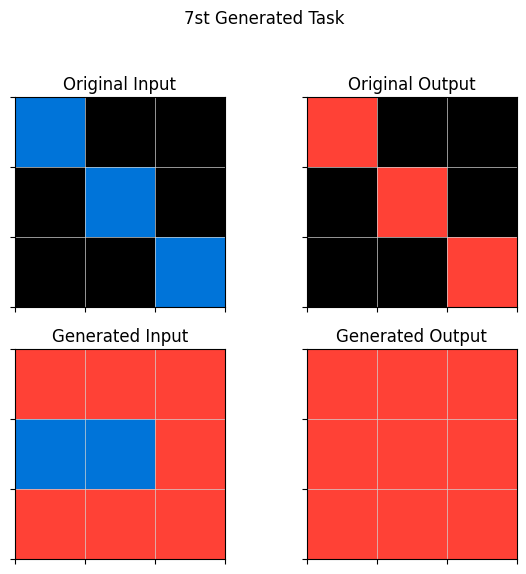

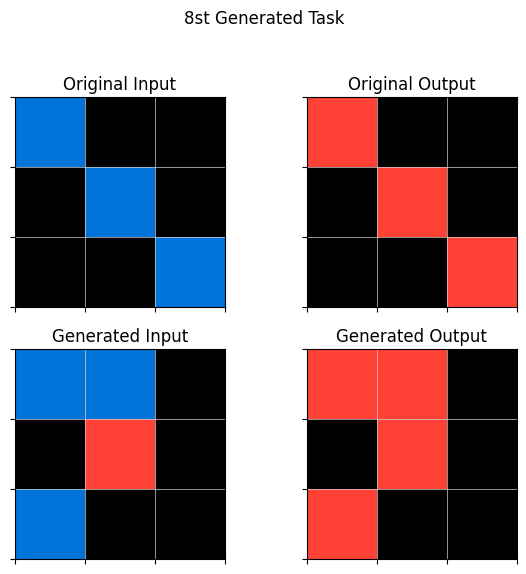

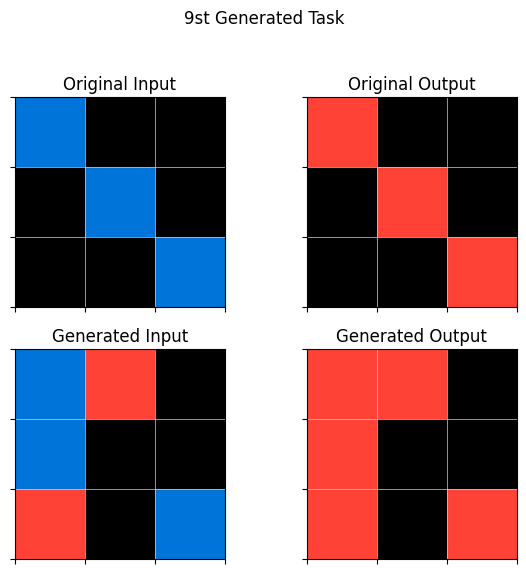

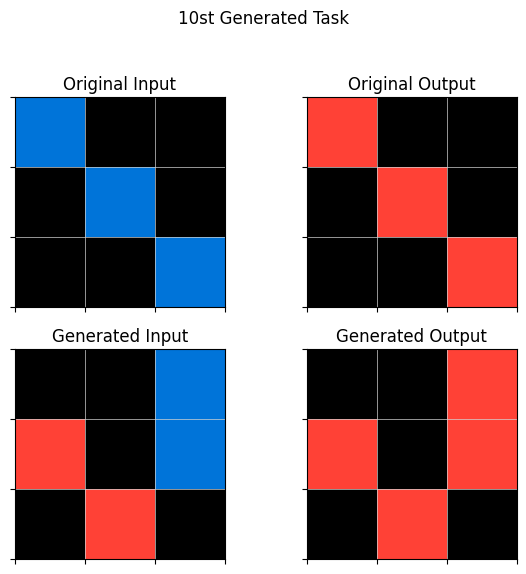

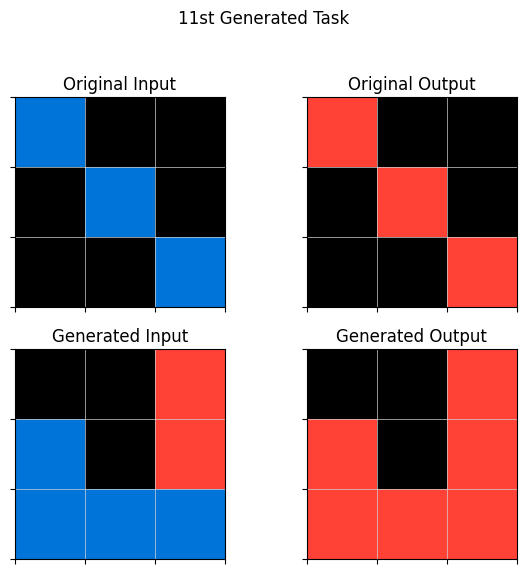

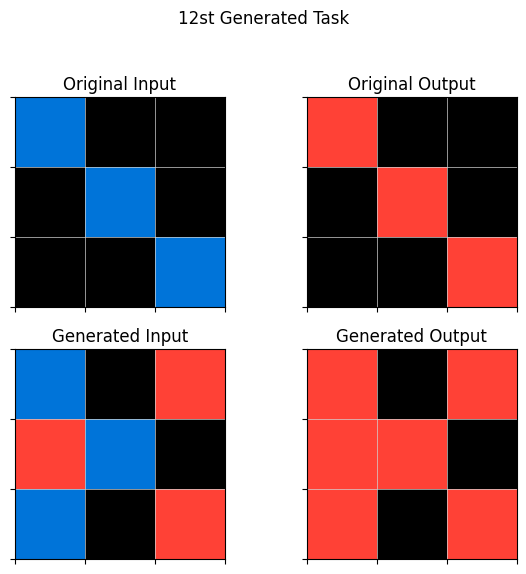

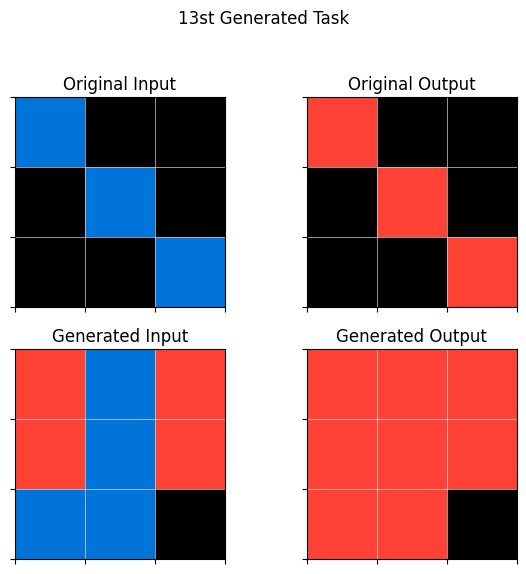

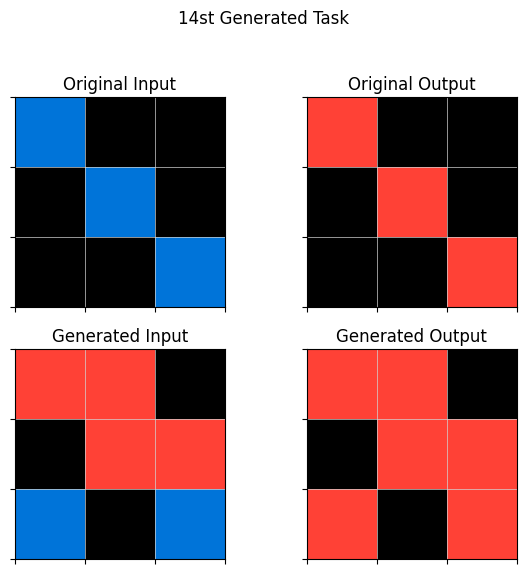

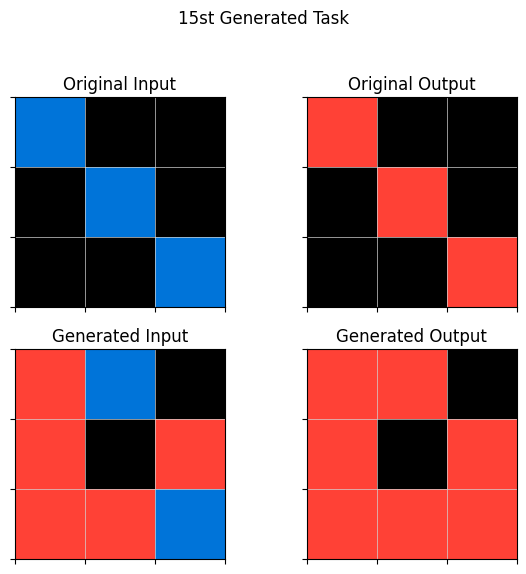

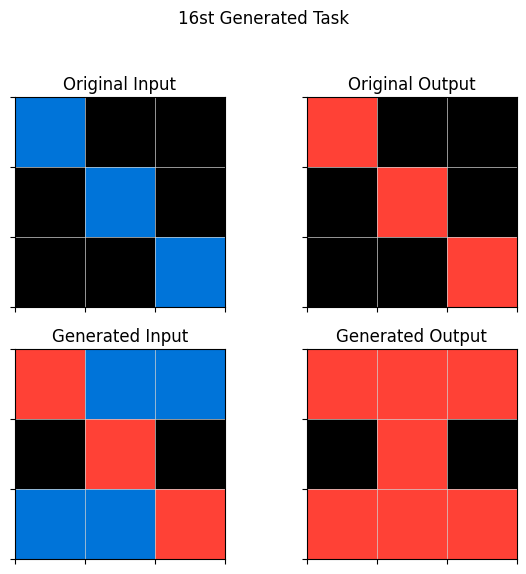

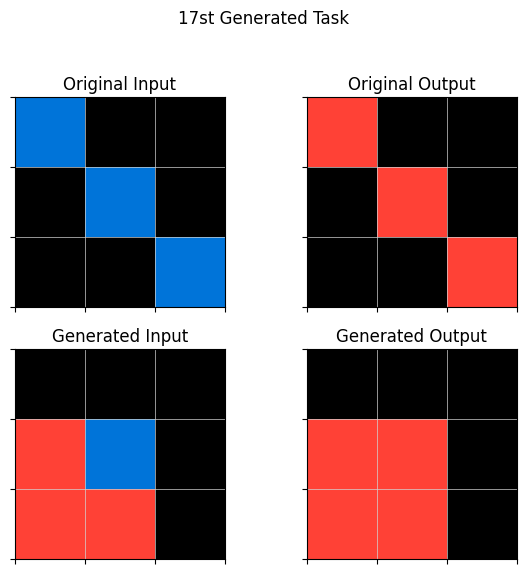

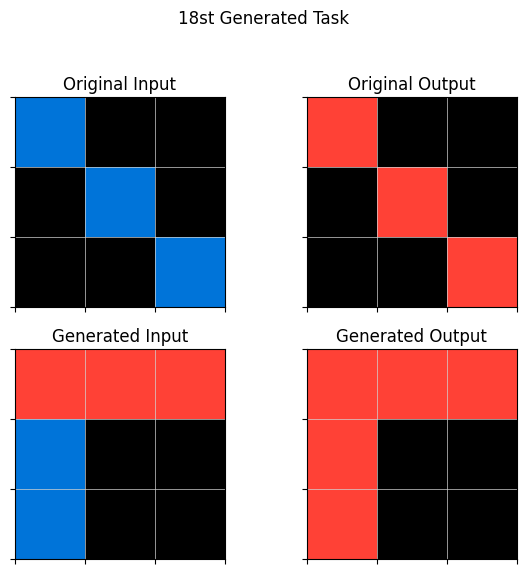

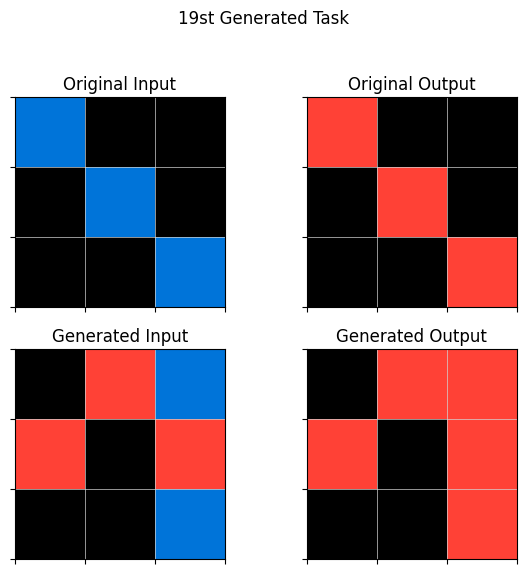

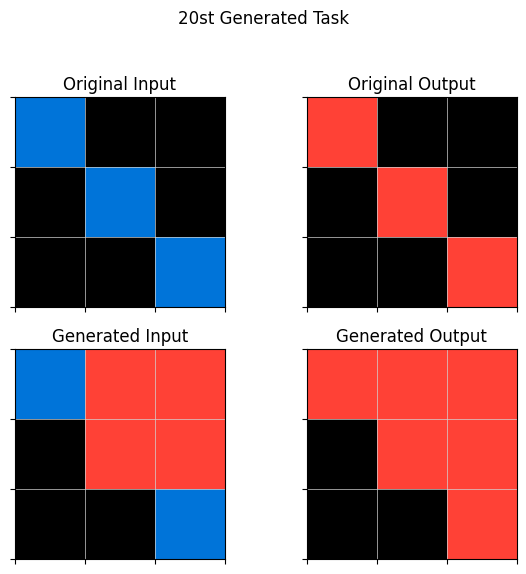

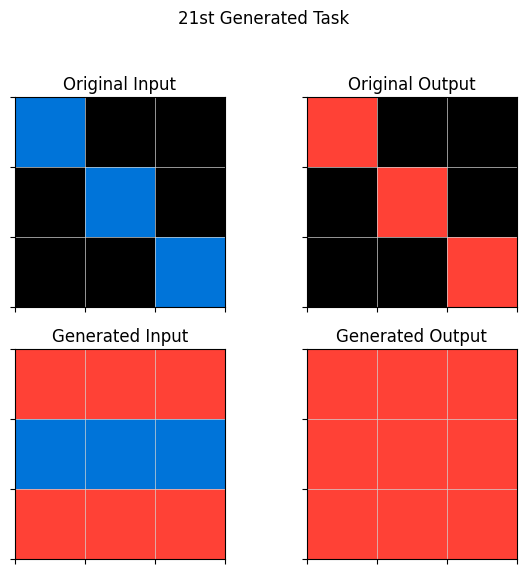

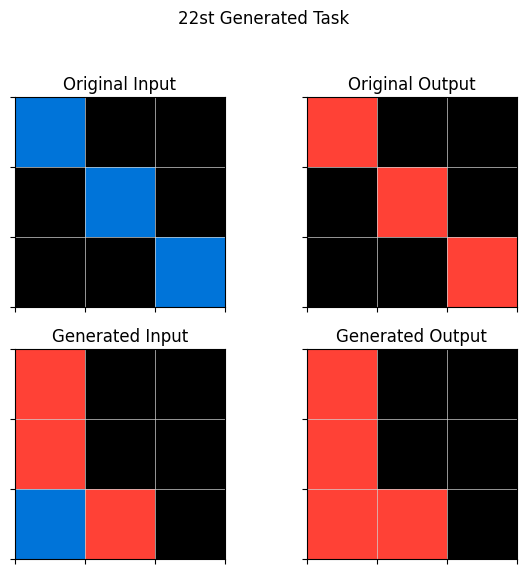

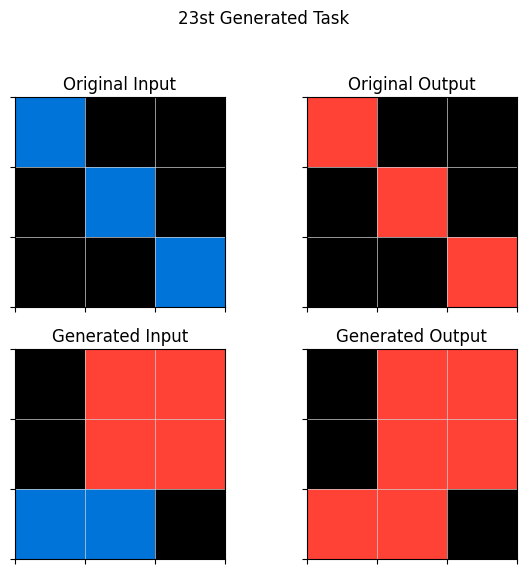

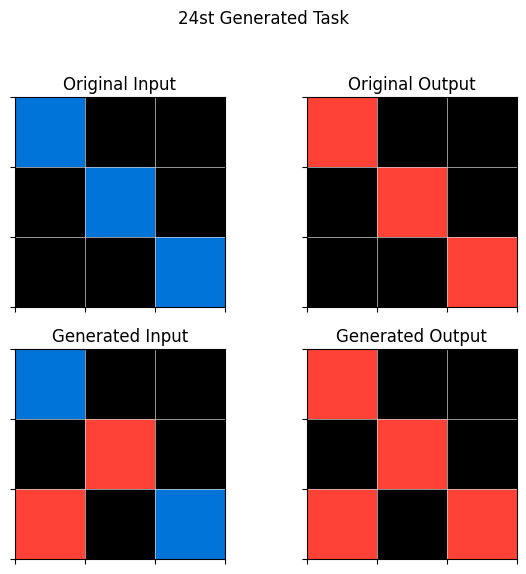

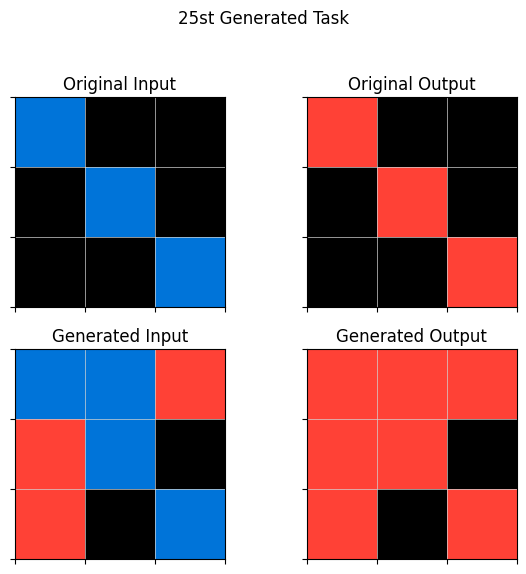

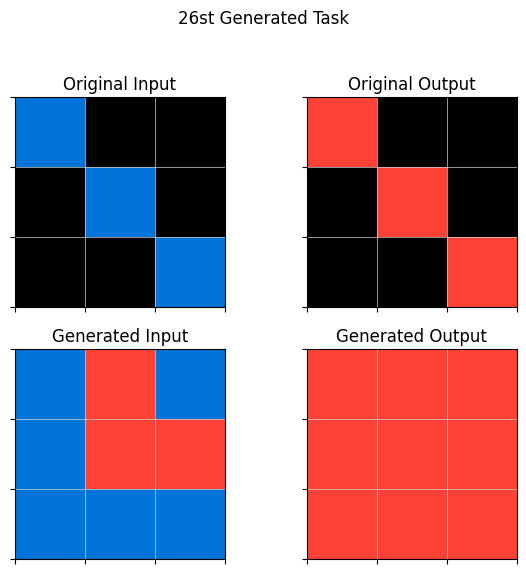

In [1]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Simple operations for mutation
def rotate_90(grid):
    return np.rot90(grid)

def flip_horizontal(grid):
    return np.fliplr(grid)

def flip_vertical(grid):
    return np.flipud(grid)

def change_color(grid, old_color, new_color):
    new_grid = copy.deepcopy(grid)
    new_grid[grid == old_color] = new_color
    return new_grid

# Define initial ARC task
input_task = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

output_task = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 2]
])

# Genetic Algorithm Functions
def apply_transformation(grid, transformations):
    transformed_grid = copy.deepcopy(grid)
    for transformation in transformations:
        if transformation == 'rotate_90':
            transformed_grid = rotate_90(transformed_grid)
        elif transformation == 'flip_horizontal':
            transformed_grid = flip_horizontal(transformed_grid)
        elif transformation == 'flip_vertical':
            transformed_grid = flip_vertical(transformed_grid)
        elif isinstance(transformation, tuple) and transformation[0] == 'change_color':
            transformed_grid = change_color(transformed_grid, transformation[1], transformation[2])
    return transformed_grid

def generate_initial_population(input_task, num_individuals=10):
    population = []
    for _ in range(num_individuals):
        individual = {
            'transformations': random.sample(['rotate_90', 'flip_horizontal', 'flip_vertical', 
                                              ('change_color', 1, 2)], k=random.randint(1, 3))
        }
        population.append(individual)
    return population

def fitness(individual, input_task, output_task):
    transformed_input = apply_transformation(input_task, individual['transformations'])
    return np.sum(transformed_input == output_task)

def select_best_individuals(population, input_task, output_task, num_best=5):
    sorted_population = sorted(population, key=lambda x: fitness(x, input_task, output_task), reverse=True)
    return sorted_population[:num_best]

def crossover(parent1, parent2):
    combined_transformations = parent1['transformations'] + parent2['transformations']
    max_k = min(len(combined_transformations), 3)
    k = min(random.randint(1, max_k), len(combined_transformations))
    child = {
        'transformations': random.sample(combined_transformations, k=k)
    }
    return child

def mutate(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        random_transformation = random.choice(['rotate_90', 'flip_horizontal', 'flip_vertical', 
                                               ('change_color', 1, 2)])
        if random.random() < 0.5:
            individual['transformations'].append(random_transformation)
        else:
            if individual['transformations']:
                individual['transformations'].remove(random.choice(individual['transformations']))
    return individual

# Main GA Loop
def genetic_algorithm(input_task, output_task, num_generations=50, population_size=26):
    population = generate_initial_population(input_task, population_size)
    for _ in range(num_generations):
        best_individuals = select_best_individuals(population, input_task, output_task)
        new_population = []
        for _ in range(population_size):
            parent1, parent2 = random.sample(best_individuals, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
    return select_best_individuals(population, input_task, output_task, num_best=1)[0]

# Visualization functions
def plot_one(ax, matrix, title):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

def plot_task(input_task, output_task, generated_input, generated_output, task_number):
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))
    fig.suptitle(f'{task_number} Generated Task')
    plot_one(axs[0, 0], input_task, 'Original Input')
    plot_one(axs[0, 1], output_task, 'Original Output')
    plot_one(axs[1, 0], generated_input, 'Generated Input')
    plot_one(axs[1, 1], generated_output, 'Generated Output')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generate 10 new tasks and visualize them
new_tasks = []
for i in range(26):
    best_individual = genetic_algorithm(input_task, output_task)
    new_input = np.random.randint(0, 3, size=input_task.shape)
    new_output = apply_transformation(new_input, best_individual['transformations'])
    plot_task(input_task, output_task, new_input, new_output, f"{i+1}st")
    new_tasks.append((new_input, new_output))


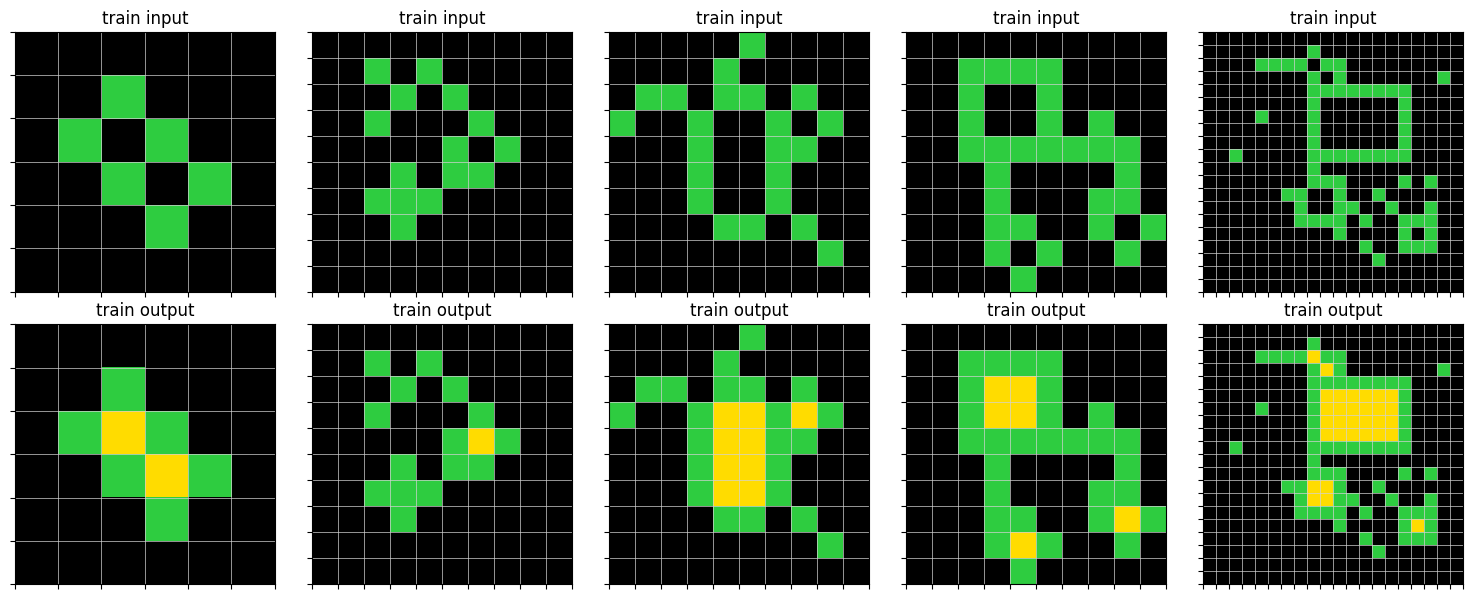

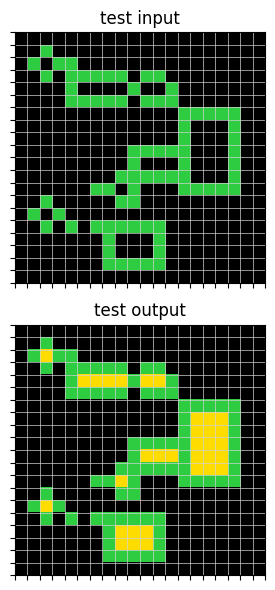

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Define the task variable here
task = {"train": [{"input": [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 3, 0, 3, 0, 0], [0, 0, 3, 0, 3, 0], [0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0]], "output": [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 3, 4, 3, 0, 0], [0, 0, 3, 4, 3, 0], [0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0]]}, {"input": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 3, 0, 3, 3, 0, 0, 0], [0, 0, 3, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], "output": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 3, 4, 3, 0, 0], [0, 0, 0, 3, 0, 3, 3, 0, 0, 0], [0, 0, 3, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}, {"input": [[0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0], [0, 3, 3, 0, 3, 3, 0, 3, 0, 0], [3, 0, 0, 3, 0, 0, 3, 0, 3, 0], [0, 0, 0, 3, 0, 0, 3, 3, 0, 0], [0, 0, 0, 3, 0, 0, 3, 0, 0, 0], [0, 0, 0, 3, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 3, 3, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], "output": [[0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0], [0, 3, 3, 0, 3, 3, 0, 3, 0, 0], [3, 0, 0, 3, 4, 4, 3, 4, 3, 0], [0, 0, 0, 3, 4, 4, 3, 3, 0, 0], [0, 0, 0, 3, 4, 4, 3, 0, 0, 0], [0, 0, 0, 3, 4, 4, 3, 0, 0, 0], [0, 0, 0, 0, 3, 3, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}, {"input": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 3, 0, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 3, 0], [0, 0, 0, 3, 0, 0, 0, 0, 3, 0], [0, 0, 0, 3, 0, 0, 0, 3, 3, 0], [0, 0, 0, 3, 3, 0, 0, 3, 0, 3], [0, 0, 0, 3, 0, 3, 0, 0, 3, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0]], "output": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 3, 4, 4, 3, 0, 0, 0, 0], [0, 0, 3, 4, 4, 3, 0, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 3, 0], [0, 0, 0, 3, 0, 0, 0, 0, 3, 0], [0, 0, 0, 3, 0, 0, 0, 3, 3, 0], [0, 0, 0, 3, 3, 0, 0, 3, 4, 3], [0, 0, 0, 3, 4, 3, 0, 0, 3, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0]]}, {"input": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], "output": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 3, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 4, 4, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 4, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}], "test": [{"input": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], "output": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 4, 4, 4, 4, 3, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 4, 4, 4, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 4, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}]}

# Function to plot a single grid
def plot_one(ax, i, train_or_test, input_or_output):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x - 0.5 for x in range(1 + len(input_matrix))])
    ax.set_xticks([x - 0.5 for x in range(1 + len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(train_or_test + ' ' + input_or_output)

# Function to plot the entire task (train and test examples)
def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using the same color scheme as the ARC app
    """    
    num_train = len(task['train'])
    fig, axs = plt.subplots(2, num_train, figsize=(3 * num_train, 6))
    for i in range(num_train):     
        plot_one(axs[0, i], i, 'train', 'input')
        plot_one(axs[1, i], i, 'train', 'output')        
    plt.tight_layout()
    plt.show()        
        
    num_test = len(task['test'])
    fig, axs = plt.subplots(2, num_test, figsize=(3 * num_test, 6))
    if num_test == 1: 
        plot_one(axs[0], 0, 'test', 'input')
        plot_one(axs[1], 0, 'test', 'output')     
    else:
        for i in range(num_test):      
            plot_one(axs[0, i], i, 'test', 'input')
            plot_one(axs[1, i], i, 'test', 'output')  
    plt.tight_layout()
    plt.show()

# Visualize the task
plot_task(task)


In [5]:
import numpy as np

def find_fill_color(input_output_pairs):
    fill_color = None
    for input_grid, output_grid in input_output_pairs:
        input_grid = np.array(input_grid)
        output_grid = np.array(output_grid)
        rows, cols = input_grid.shape
        for i in range(1, rows - 1):
            for j in range(1, cols - 1):
                if input_grid[i, j] == 0:  # Check only the black pixels
                    top = input_grid[i-1, j]
                    bottom = input_grid[i+1, j]
                    left = input_grid[i, j-1]
                    right = input_grid[i, j+1]
                    
                    # Check if all surrounding pixels have the same non-zero color
                    if top == bottom == left == right and top != 0:
                        # The corresponding output should have the filled color
                        fill_color = output_grid[i, j]
                        return fill_color  # Stop once we find the color
                        
    return fill_color

def fill(input_grid, fill_color):
    grid = np.array(input_grid)
    rows, cols = grid.shape
    filled_grid = grid.copy()  # We'll modify the filled_grid to keep input_grid unchanged

    # Loop through every pixel in the grid except the borders
    for i in range(1, rows - 1):  # Start at 1 and end at rows-1 to avoid border issues
        for j in range(1, cols - 1):
            if grid[i, j] == 0:  # Only process if the center pixel is black (0)
                # Get surrounding pixels: top, bottom, left, right
                top = grid[i-1, j]
                bottom = grid[i+1, j]
                left = grid[i, j-1]
                right = grid[i, j+1]

                # Check if all surrounding pixels have the same non-zero color
                if top == bottom == left == right and top != 0:
                    # Fill the center pixel with the fill_color
                    filled_grid[i, j] = fill_color

    # Convert back to a list of lists
    return filled_grid.tolist()

# Example task from your input
task = {
    "train": [
        {"input": [[0, 0, 0, 0, 0, 0],
                   [0, 0, 3, 0, 0, 0],
                   [0, 3, 0, 3, 0, 0],
                   [0, 0, 3, 0, 3, 0],
                   [0, 0, 0, 3, 0, 0],
                   [0, 0, 0, 0, 0, 0]],
         "output": [[0, 0, 0, 0, 0, 0],
                    [0, 0, 3, 0, 0, 0],
                    [0, 3, 4, 3, 0, 0],
                    [0, 0, 3, 4, 3, 0],
                    [0, 0, 0, 3, 0, 0],
                    [0, 0, 0, 0, 0, 0]]
        },
        {"input": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 3, 0, 3, 0, 0, 0, 0, 0],
                   [0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
                   [0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
                   [0, 0, 0, 0, 0, 3, 0, 3, 0, 0],
                   [0, 0, 0, 3, 0, 3, 3, 0, 0, 0],
                   [0, 0, 3, 3, 3, 0, 0, 0, 0, 0],
                   [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
         "output": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 3, 0, 3, 0, 0, 0, 0, 0],
                    [0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
                    [0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
                    [0, 0, 0, 0, 0, 3, 4, 3, 0, 0],
                    [0, 0, 0, 3, 0, 3, 3, 0, 0, 0],
                    [0, 0, 3, 3, 3, 0, 0, 0, 0, 0],
                    [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
        }
    ],
    "test": [
        {"input": [[0, 0, 0, 0, 0, 0],
                   [0, 0, 3, 0, 0, 0],
                   [0, 3, 0, 3, 0, 0],
                   [0, 0, 3, 0, 3, 0],
                   [0, 0, 0, 3, 0, 0],
                   [0, 0, 0, 0, 0, 0]]
        }
    ]
}

# Extracting input-output pairs from the task
train_pairs = [(train_example["input"], train_example["output"]) for train_example in task["train"]]

# Determine the fill color from the training examples
fill_color = find_fill_color(train_pairs)

# Apply the fill function to the test input grid
test_input = task["test"][0]["input"]
filled_test_output = fill(test_input, fill_color)

filled_test_output  # This is the output of the test grid after filling


[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 4, 3, 0, 0],
 [0, 0, 3, 4, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]

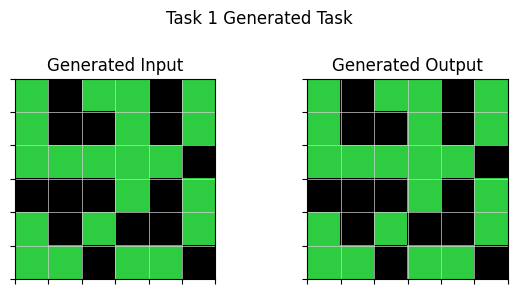

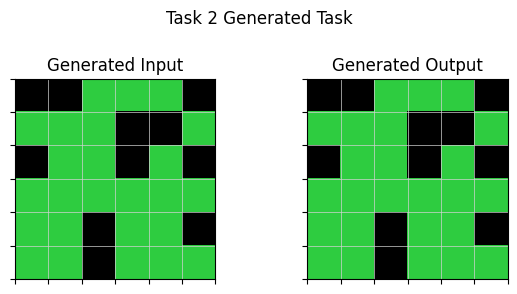

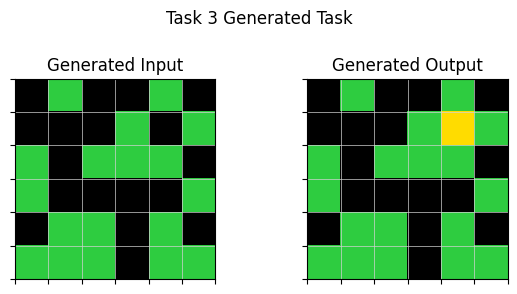

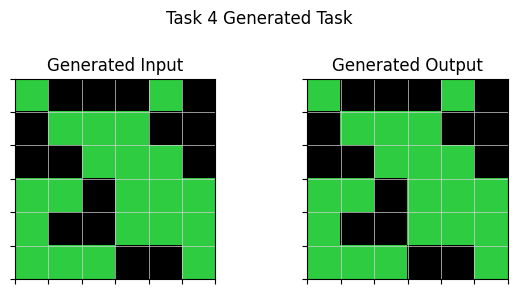

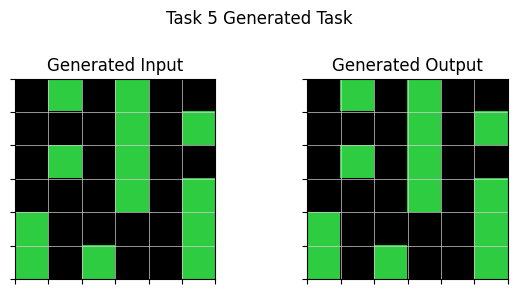

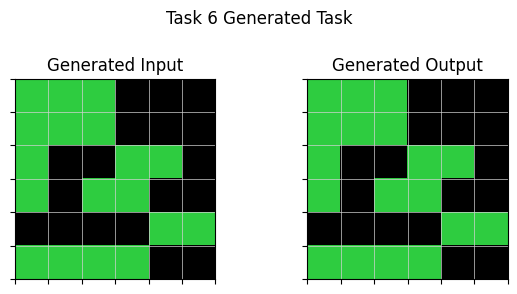

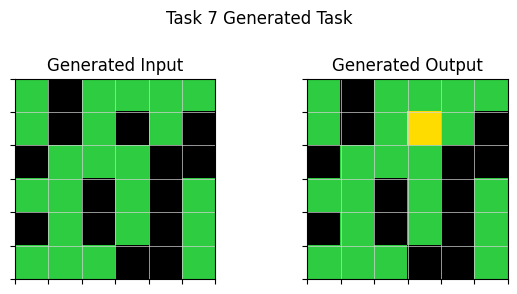

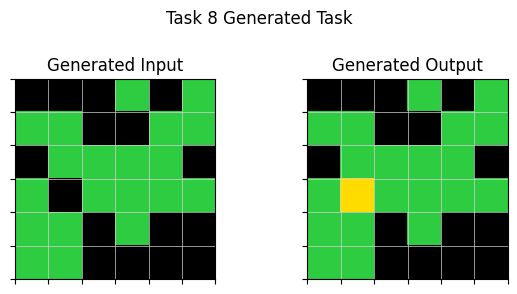

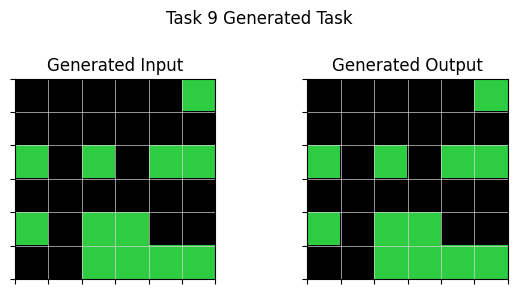

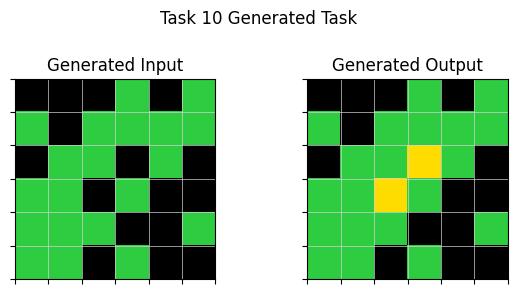

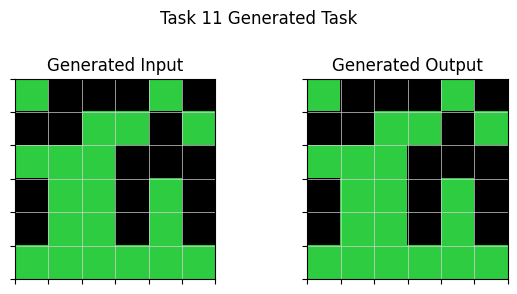

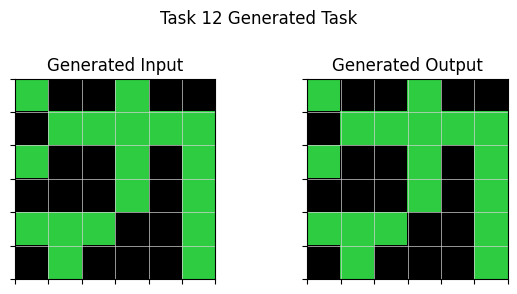

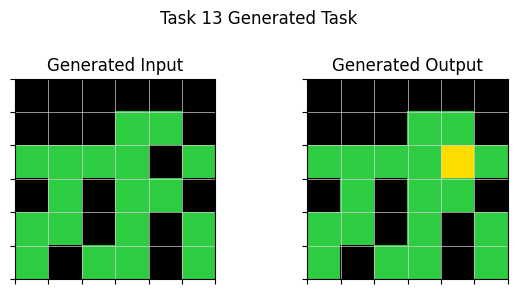

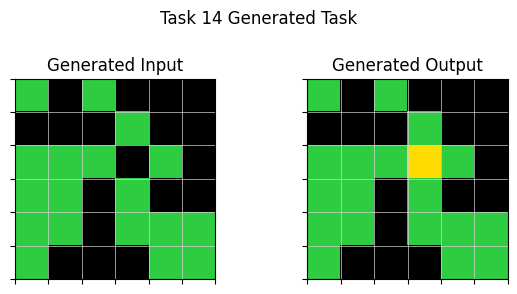

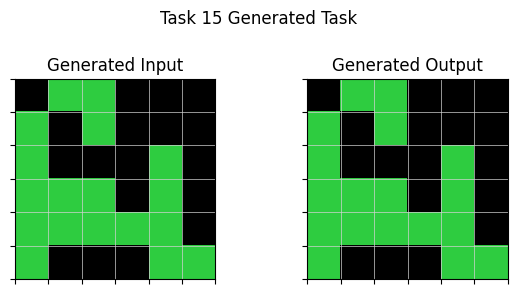

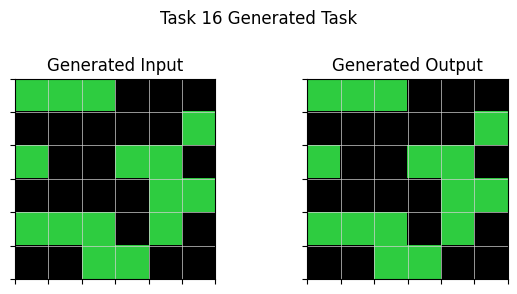

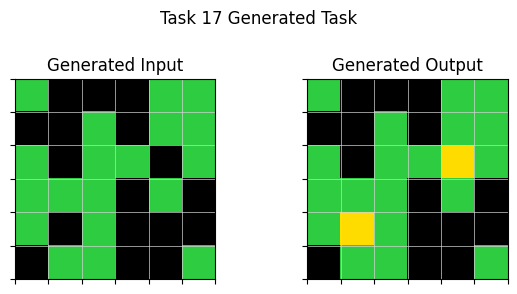

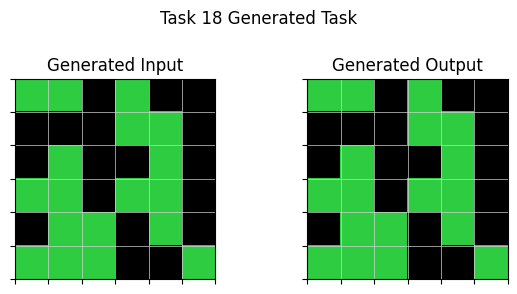

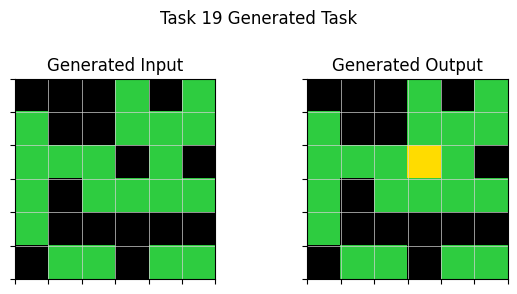

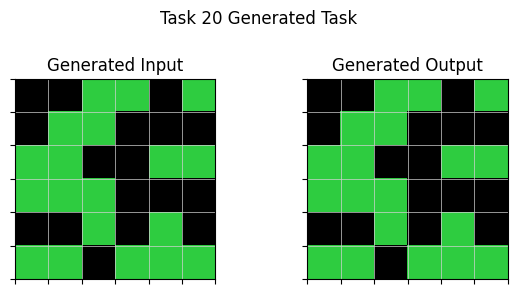

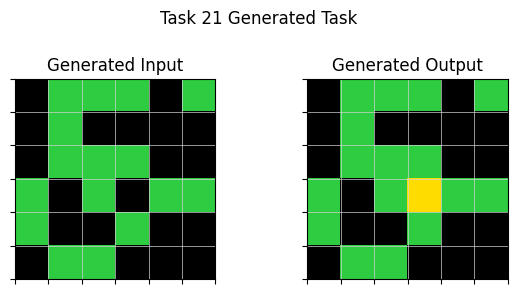

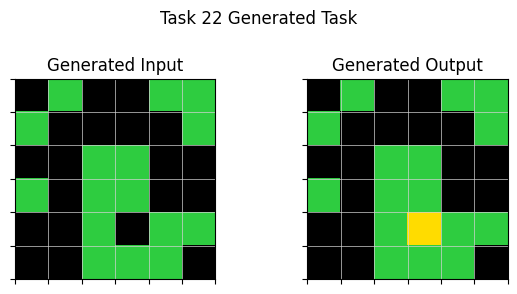

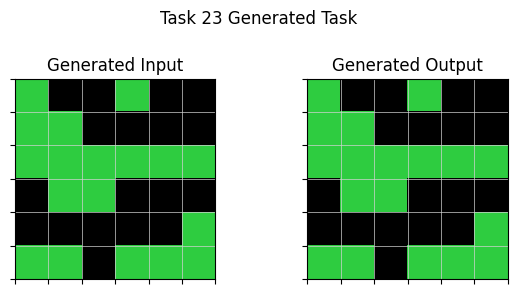

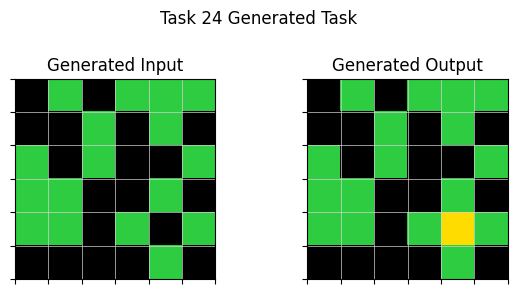

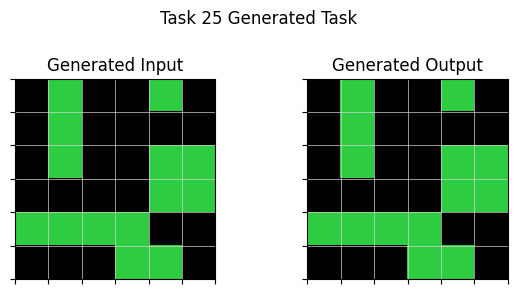

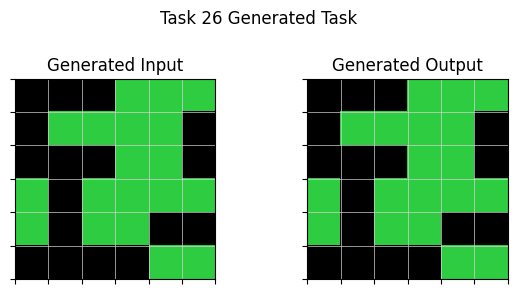

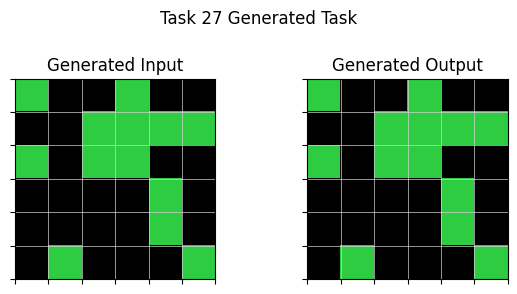

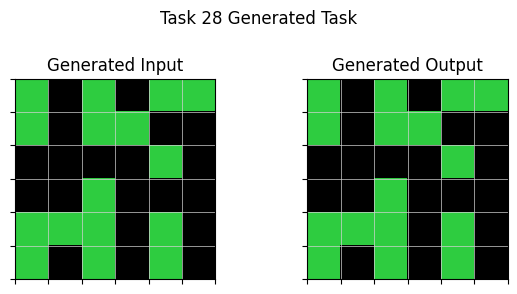

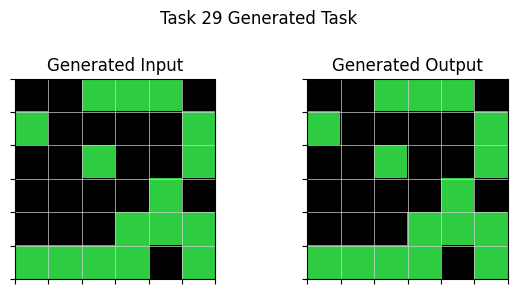

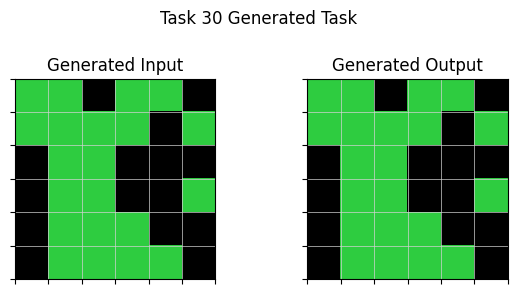

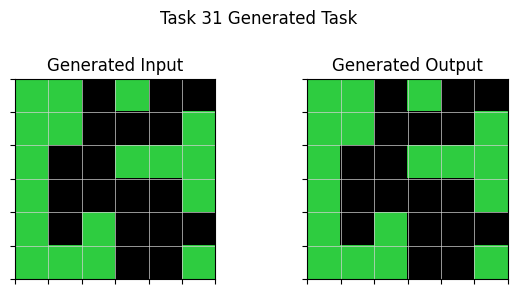

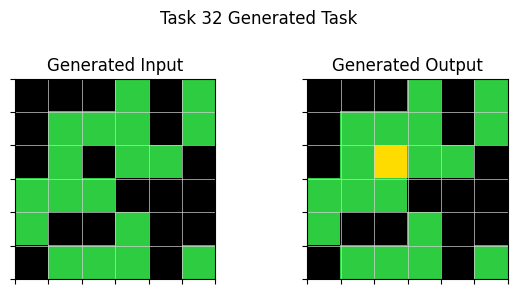

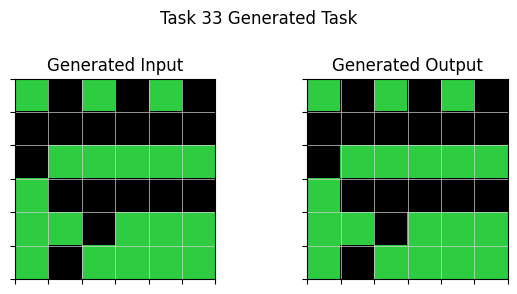

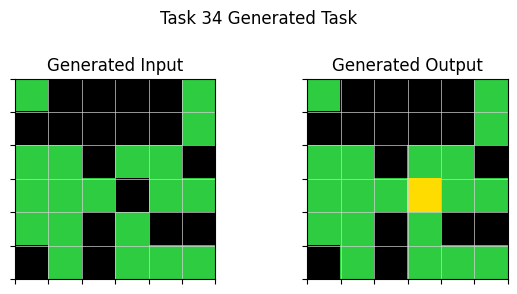

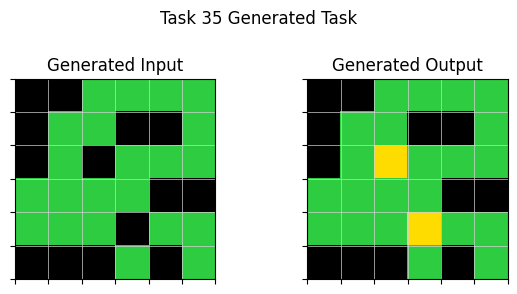

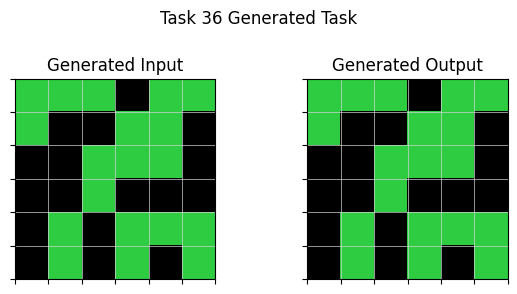

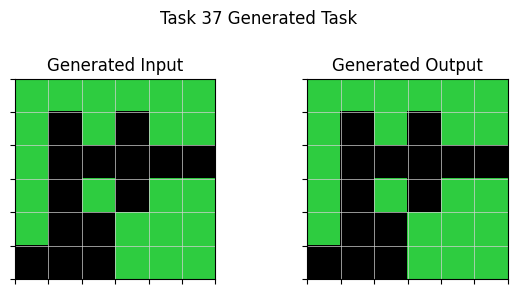

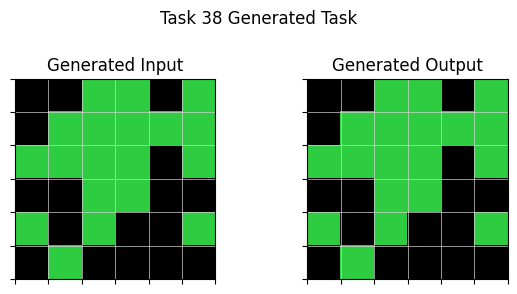

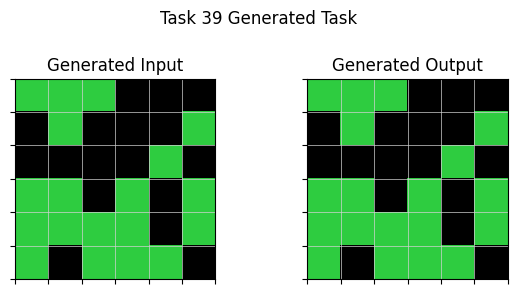

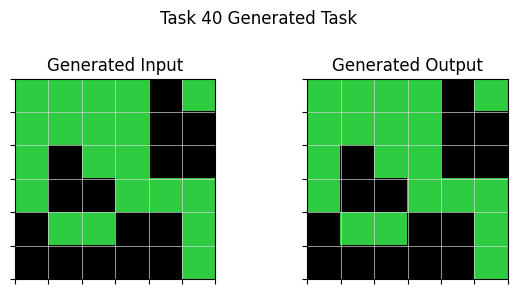

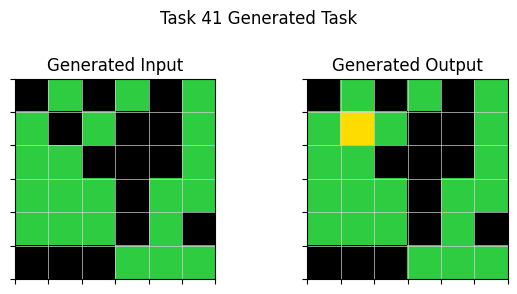

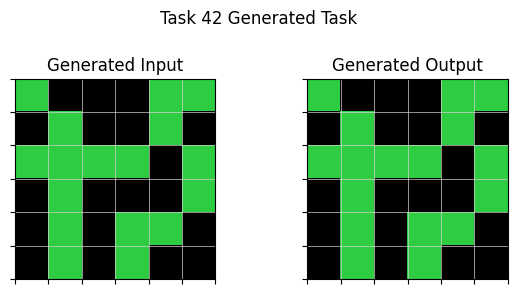

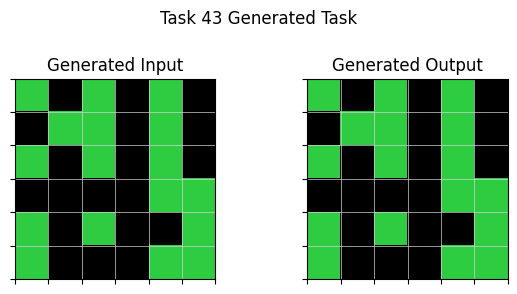

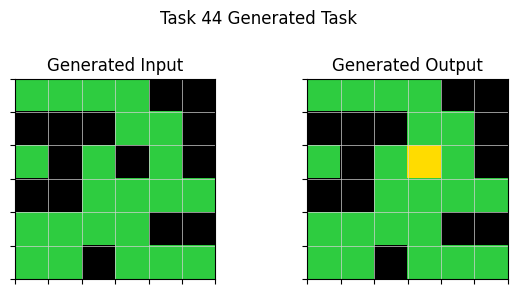

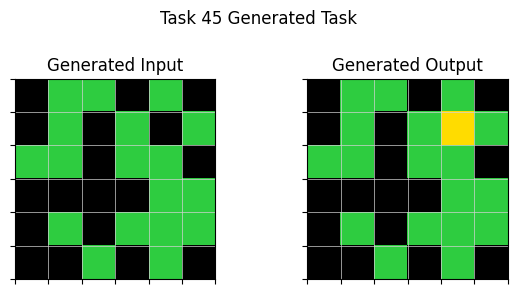

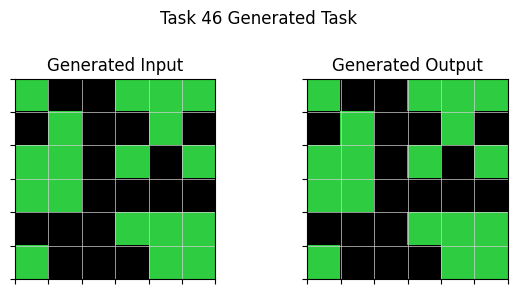

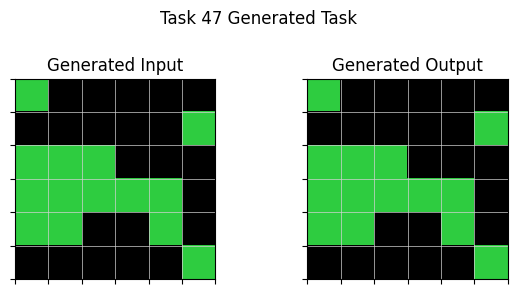

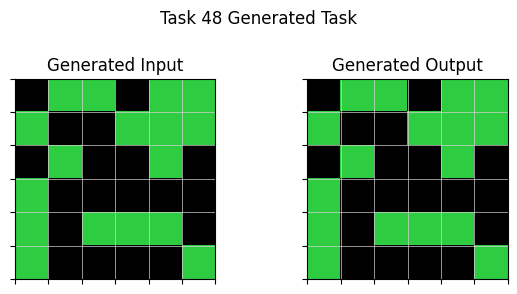

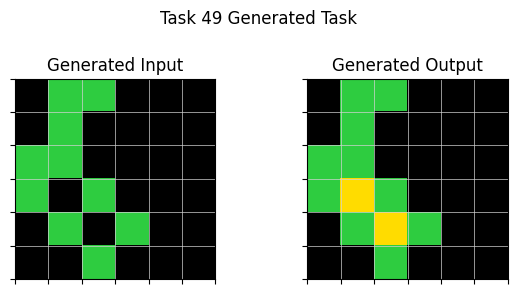

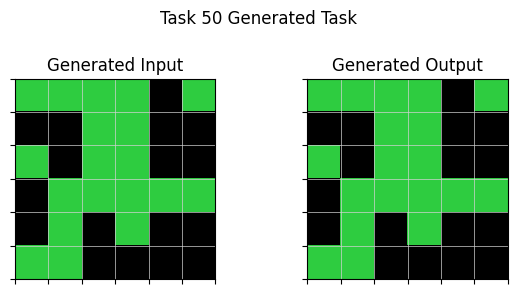

In [2]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Initial ARC task provided as an example
input_task = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [0, 3, 0, 3, 0, 0],
    [0, 0, 3, 0, 3, 0],
    [0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

output_task = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [0, 3, 4, 3, 0, 0],
    [0, 0, 3, 4, 3, 0],
    [0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

# Transformation functions (rotation, flipping, color changing)
def rotate_90(grid):
    return np.rot90(grid)

def flip_horizontal(grid):
    return np.fliplr(grid)

def flip_vertical(grid):
    return np.flipud(grid)

def change_color(grid, old_color, new_color):
    new_grid = copy.deepcopy(grid)
    new_grid[grid == old_color] = new_color
    return new_grid

# Function to apply fill rule: turn black pixels surrounded by green into yellow
def apply_fill_rule(input_grid):
    output_grid = copy.deepcopy(input_grid)
    rows, cols = input_grid.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if input_grid[i, j] == 0:  # Black pixel
                # Check if surrounded by green pixels
                if input_grid[i - 1, j] == 3 and input_grid[i + 1, j] == 3 and \
                   input_grid[i, j - 1] == 3 and input_grid[i, j + 1] == 3:
                    output_grid[i, j] = 4  # Fill with yellow
    return output_grid

# Genetic Algorithm Functions
def apply_transformation(grid, transformations):
    transformed_grid = copy.deepcopy(grid)
    for transformation in transformations:
        if transformation == 'rotate_90':
            transformed_grid = rotate_90(transformed_grid)
        elif transformation == 'flip_horizontal':
            transformed_grid = flip_horizontal(transformed_grid)
        elif transformation == 'flip_vertical':
            transformed_grid = flip_vertical(transformed_grid)
    return transformed_grid

# Generate the initial population of grids
def generate_initial_population(num_individuals=10, rows=6, cols=6):
    population = []
    for _ in range(num_individuals):
        individual = {
            'input_grid': np.random.choice([0, 3], size=(rows, cols), p=[0.7, 0.3])  # Mostly black, some green
        }
        # Ensure each grid follows the fill rule
        individual['output_grid'] = apply_fill_rule(individual['input_grid'])
        population.append(individual)
    return population

# Fitness function to evaluate how well the generated grid follows the fill rule
def fitness(individual):
    input_grid = individual['input_grid']
    expected_output = apply_fill_rule(input_grid)
    return np.sum(individual['output_grid'] == expected_output)

# Select best individuals based on fitness
def select_best_individuals(population, num_best=5):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:num_best]

# Crossover function to combine two parent grids
def crossover(parent1, parent2):
    rows, cols = parent1['input_grid'].shape
    child_input = parent1['input_grid'].copy()
    crossover_point = random.randint(1, rows - 2)
    child_input[crossover_point:, :] = parent2['input_grid'][crossover_point:, :]
    child_output = apply_fill_rule(child_input)
    return {'input_grid': child_input, 'output_grid': child_output}

# Mutate the grid by randomly changing some pixels
def mutate(individual, mutation_rate=0.1):
    grid = individual['input_grid']
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if random.random() < mutation_rate:
                grid[i, j] = random.choice([0, 3])  # Change between black and green
    individual['output_grid'] = apply_fill_rule(grid)
    return individual

# Main Genetic Algorithm Loop
def genetic_algorithm(num_generations=50, population_size=10, rows=6, cols=6):
    population = generate_initial_population(population_size, rows, cols)
    for generation in range(num_generations):
        best_individuals = select_best_individuals(population)
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(best_individuals, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
    return select_best_individuals(population, num_best=1)[0]

# Visualization functions
def plot_one(ax, matrix, title):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)
    ax.set_xticks([x - 0.5 for x in range(1 + len(matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

def plot_task(input_task, output_task, task_number):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(f'{task_number} Generated Task')
    plot_one(axs[0], input_task, 'Generated Input')
    plot_one(axs[1], output_task, 'Generated Output')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generate 10 new tasks and visualize them
new_tasks = []
for i in range(50):
    best_individual = genetic_algorithm(num_generations=50, population_size=50)
    generated_input = best_individual['input_grid']
    generated_output = best_individual['output_grid']
    plot_task(generated_input, generated_output, f"Task {i + 1}")
    new_tasks.append((generated_input, generated_output))


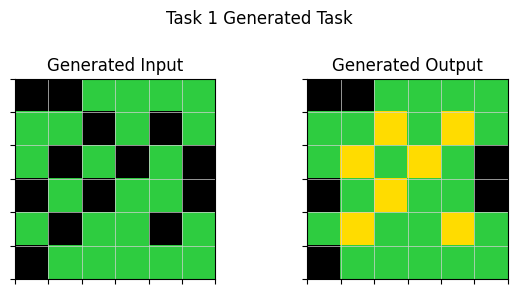

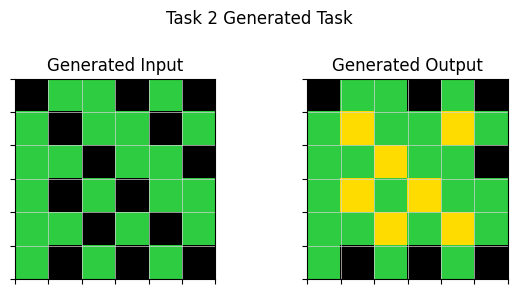

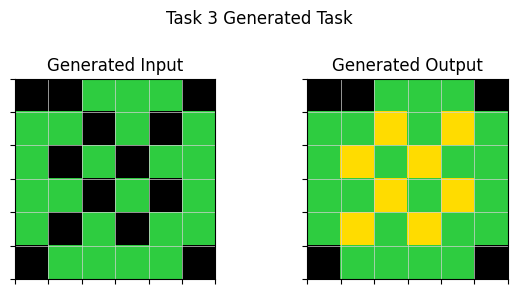

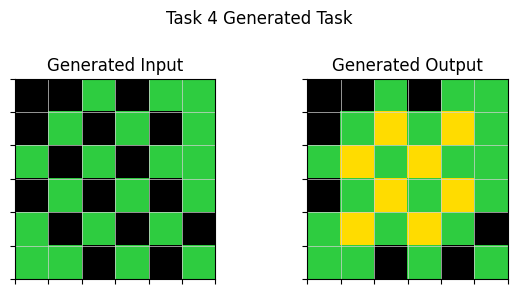

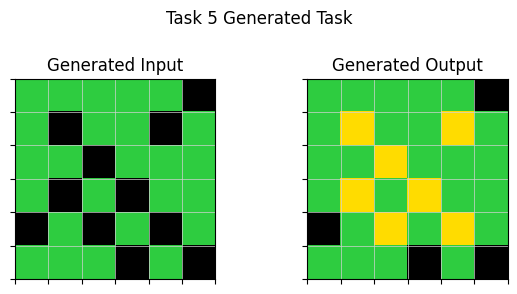

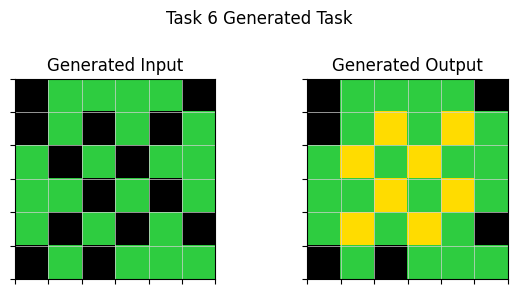

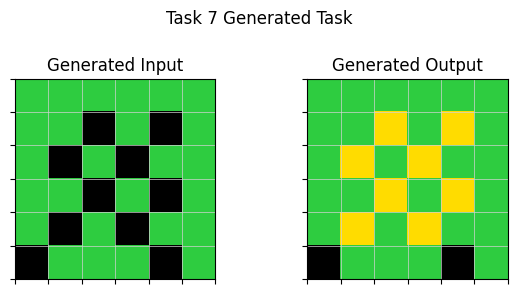

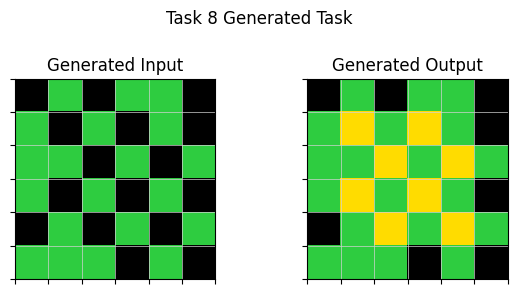

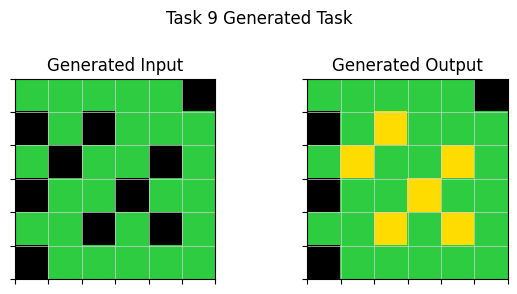

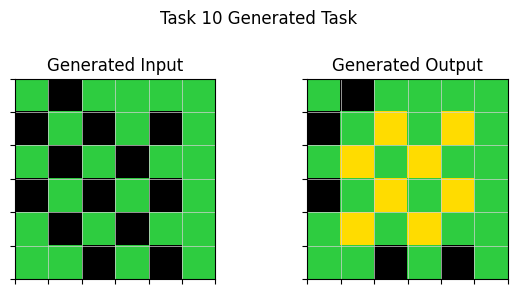

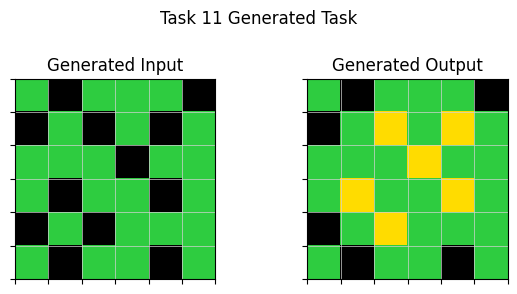

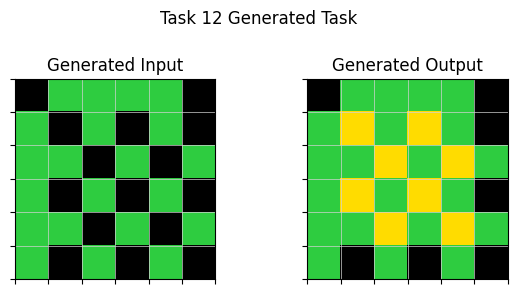

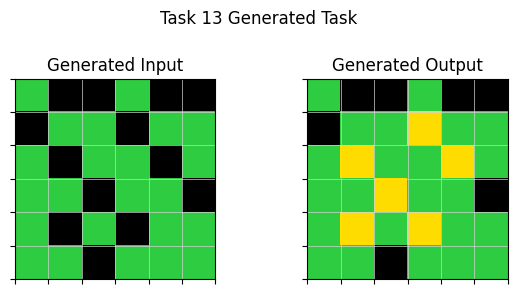

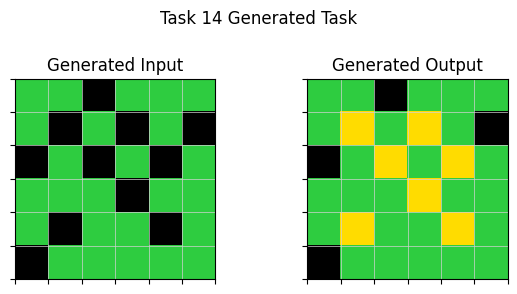

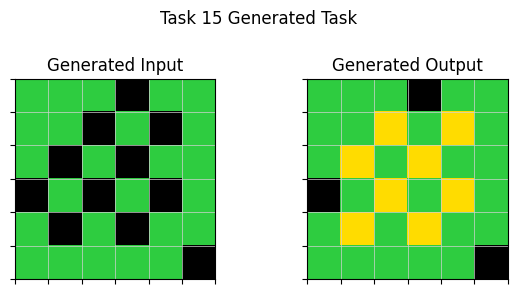

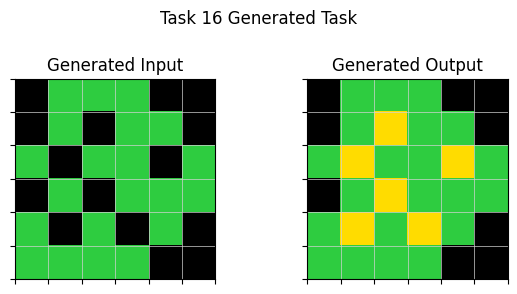

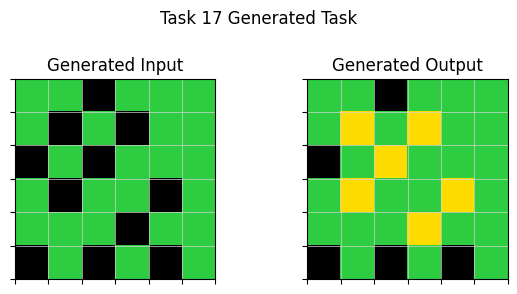

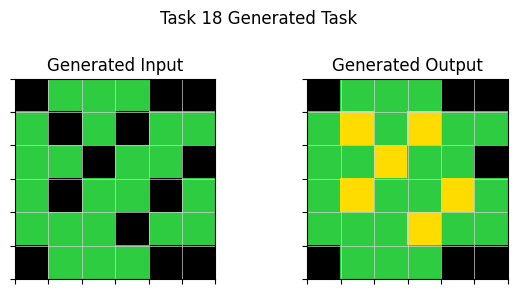

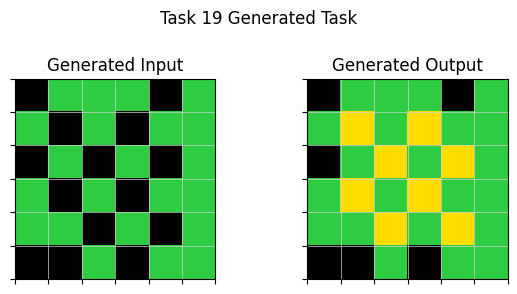

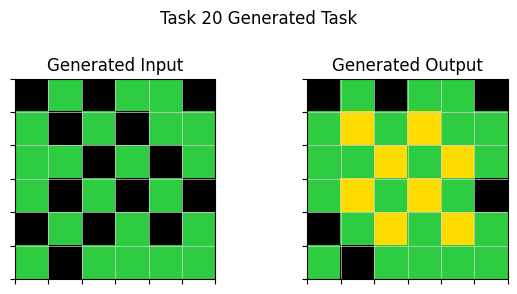

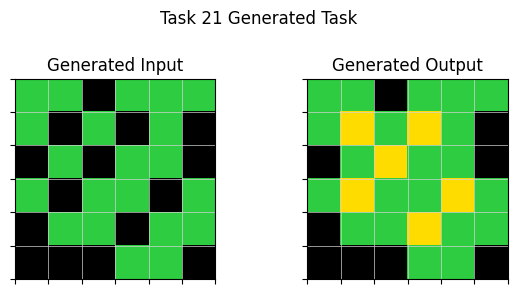

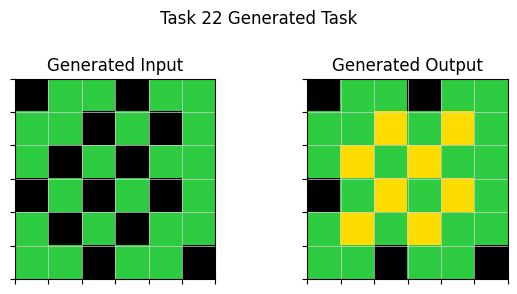

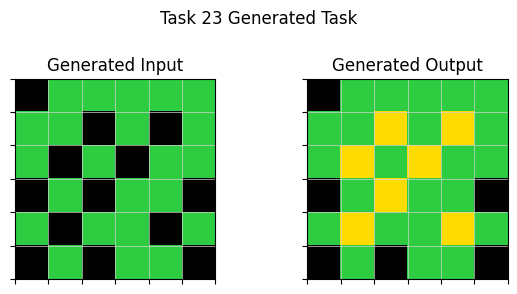

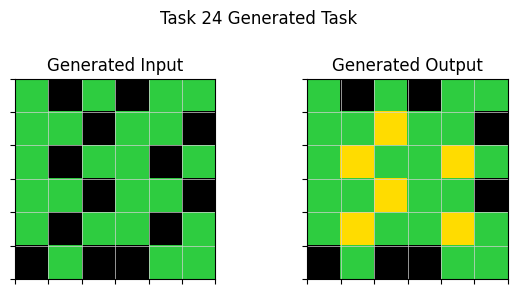

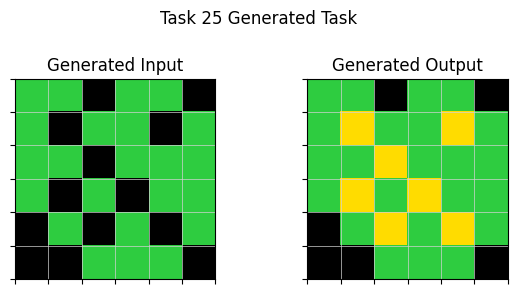

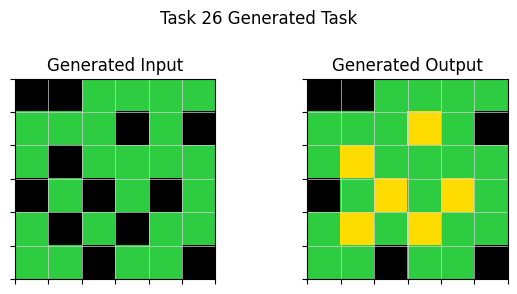

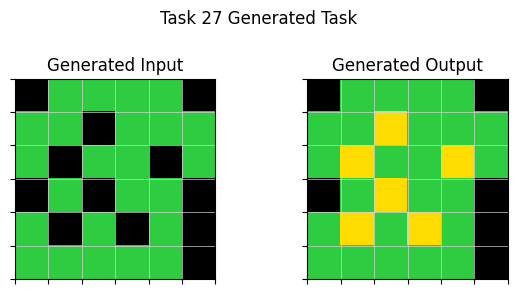

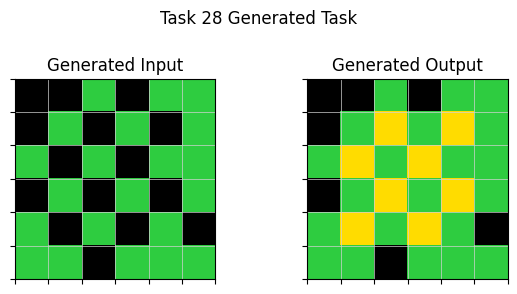

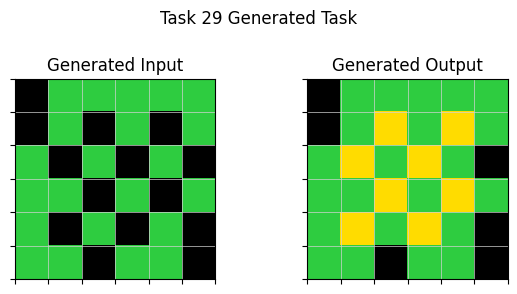

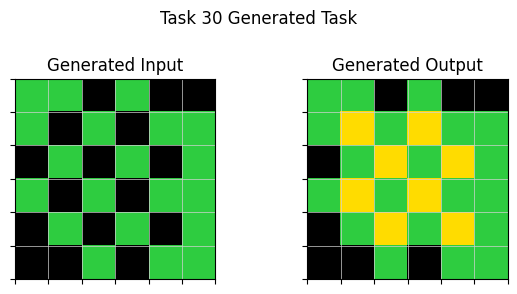

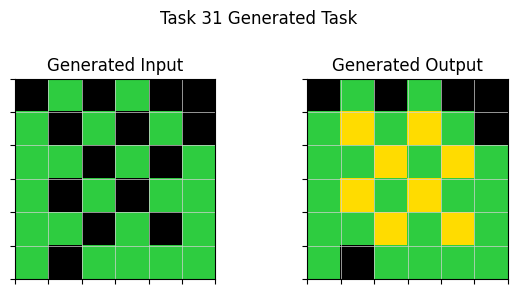

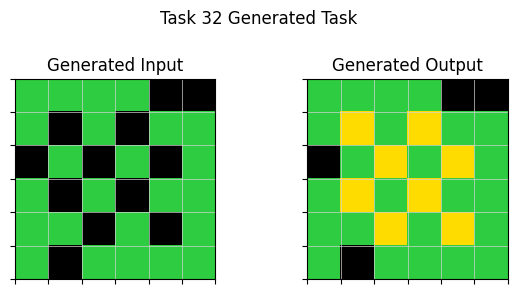

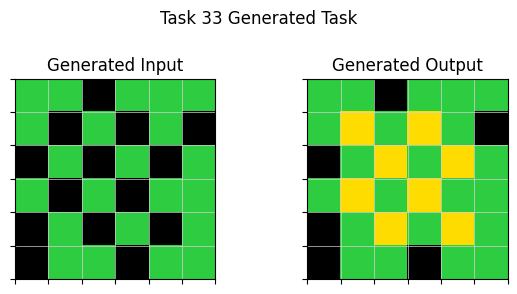

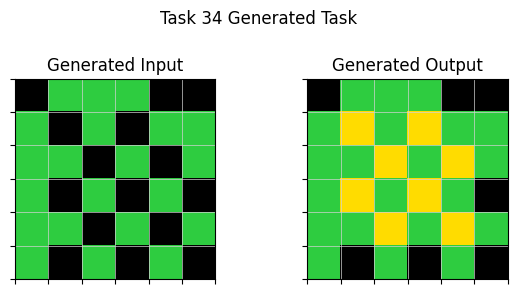

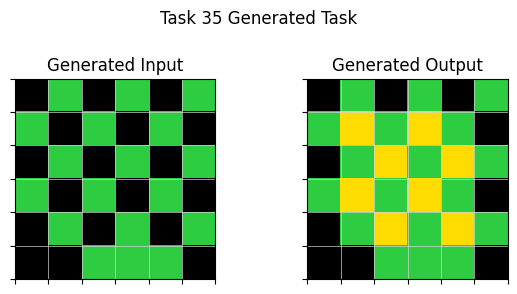

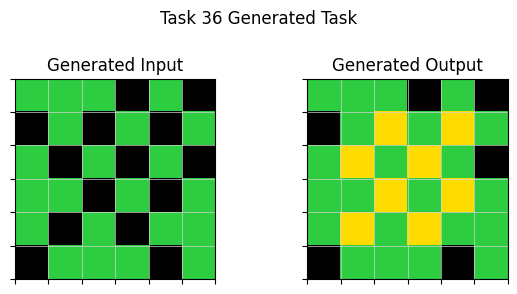

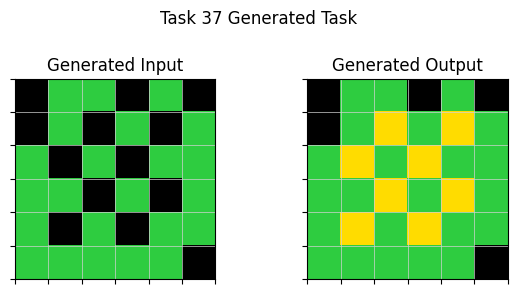

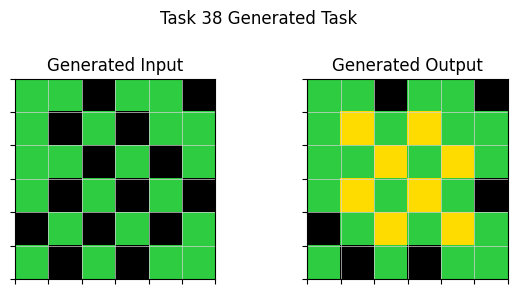

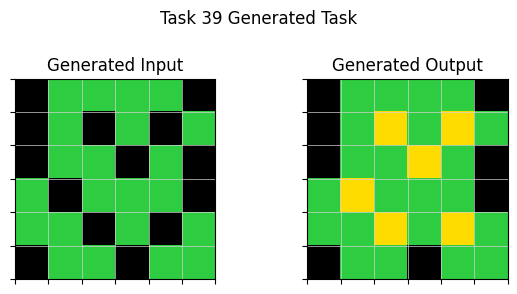

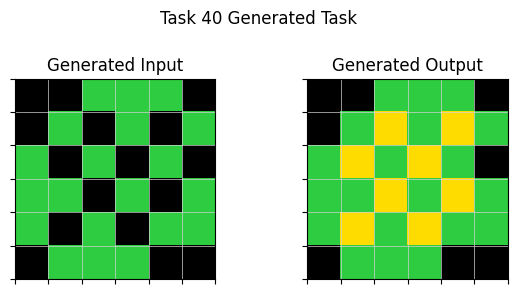

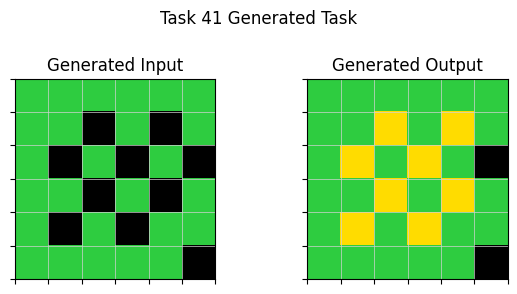

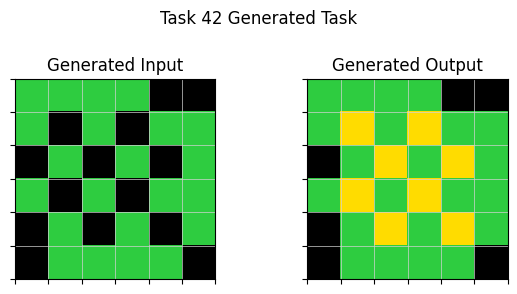

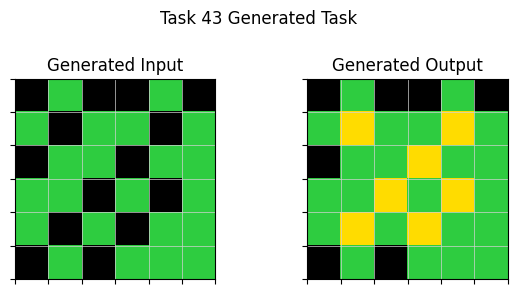

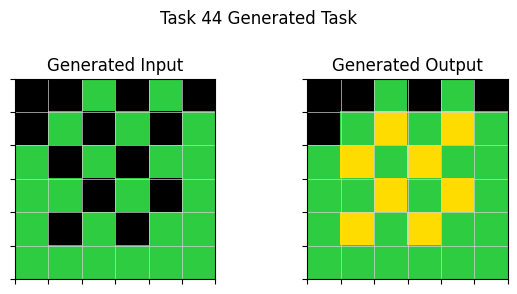

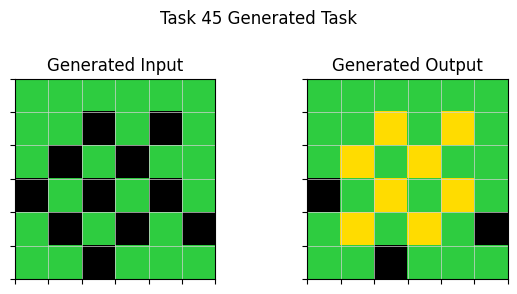

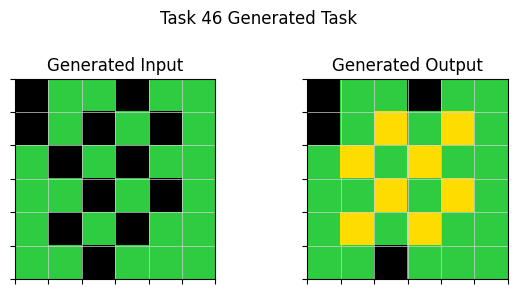

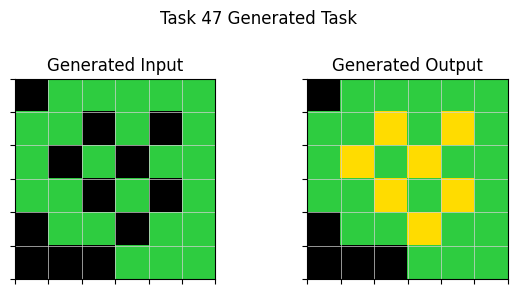

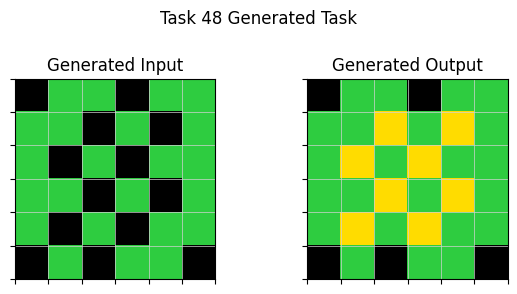

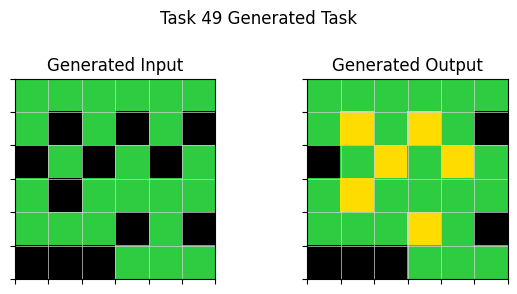

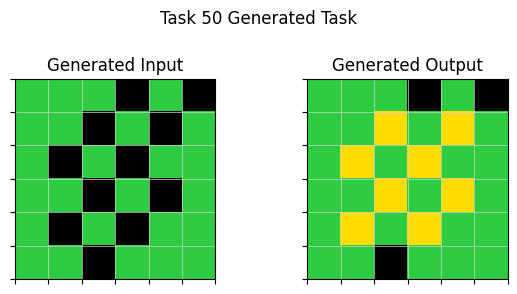

In [5]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Initial ARC task provided as an example
input_task = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [0, 3, 0, 3, 0, 0],
    [0, 0, 3, 0, 3, 0],
    [0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

output_task = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [0, 3, 4, 3, 0, 0],
    [0, 0, 3, 4, 3, 0],
    [0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

# Transformation functions (rotation, flipping, color changing)
def rotate_90(grid):
    return np.rot90(grid)

def flip_horizontal(grid):
    return np.fliplr(grid)

def flip_vertical(grid):
    return np.flipud(grid)

def change_color(grid, old_color, new_color):
    new_grid = copy.deepcopy(grid)
    new_grid[grid == old_color] = new_color
    return new_grid

# Function to apply fill rule: turn black pixels surrounded by green into yellow
def apply_fill_rule(input_grid):
    output_grid = copy.deepcopy(input_grid)
    rows, cols = input_grid.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if input_grid[i, j] == 0:  # Black pixel
                # Check if surrounded by green pixels
                if input_grid[i - 1, j] == 3 and input_grid[i + 1, j] == 3 and \
                   input_grid[i, j - 1] == 3 and input_grid[i, j + 1] == 3:
                    output_grid[i, j] = 4  # Fill with yellow
    return output_grid

# Genetic Algorithm Functions
def apply_transformation(grid, transformations):
    transformed_grid = copy.deepcopy(grid)
    for transformation in transformations:
        if transformation == 'rotate_90':
            transformed_grid = rotate_90(transformed_grid)
        elif transformation == 'flip_horizontal':
            transformed_grid = flip_horizontal(transformed_grid)
        elif transformation == 'flip_vertical':
            transformed_grid = flip_vertical(transformed_grid)
    return transformed_grid

# Generate the initial population of grids
def generate_initial_population(num_individuals=10, rows=6, cols=6):
    population = []
    for _ in range(num_individuals):
        individual = {
            'input_grid': np.random.choice([0, 3], size=(rows, cols), p=[0.7, 0.3])  # Mostly black, some green
        }
        # Ensure each grid follows the fill rule
        individual['output_grid'] = apply_fill_rule(individual['input_grid'])
        population.append(individual)
    return population

# Updated fitness function to encourage filling more pixels
def fitness(individual):
    input_grid = individual['input_grid']
    expected_output = apply_fill_rule(input_grid)
    
    # Count the number of pixels that were correctly filled
    correctly_filled_pixels = np.sum((individual['output_grid'] == expected_output) & (expected_output == 4))
    
    # Add a bonus for each correctly filled pixel to encourage more filling
    fitness_score = correctly_filled_pixels * 10  # Bonus for correct fills
    
    return fitness_score

# Select best individuals based on fitness
def select_best_individuals(population, num_best=5):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:num_best]

# Crossover function to combine two parent grids
def crossover(parent1, parent2):
    rows, cols = parent1['input_grid'].shape
    child_input = parent1['input_grid'].copy()
    crossover_point = random.randint(1, rows - 2)
    child_input[crossover_point:, :] = parent2['input_grid'][crossover_point:, :]
    child_output = apply_fill_rule(child_input)
    return {'input_grid': child_input, 'output_grid': child_output}

# Mutate the grid by randomly changing some pixels
def mutate(individual, mutation_rate=0.1):
    grid = individual['input_grid']
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if random.random() < mutation_rate:
                grid[i, j] = random.choice([0, 3])  # Change between black and green
    individual['output_grid'] = apply_fill_rule(grid)
    return individual

# Main Genetic Algorithm Loop
def genetic_algorithm(num_generations=50, population_size=10, rows=6, cols=6):
    population = generate_initial_population(population_size, rows, cols)
    for generation in range(num_generations):
        best_individuals = select_best_individuals(population)
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(best_individuals, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
    return select_best_individuals(population, num_best=1)[0]

# Visualization functions
def plot_one(ax, matrix, title):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)
    ax.set_xticks([x - 0.5 for x in range(1 + len(matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

def plot_task(input_task, output_task, task_number):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(f'{task_number} Generated Task')
    plot_one(axs[0], input_task, 'Generated Input')
    plot_one(axs[1], output_task, 'Generated Output')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generate 20 new tasks and visualize them
new_tasks = []
for i in range(50):  # Change this from 10 to 20
    best_individual = genetic_algorithm(num_generations=50, population_size=50)
    generated_input = best_individual['input_grid']
    generated_output = best_individual['output_grid']
    plot_task(generated_input, generated_output, f"Task {i + 1}")
    new_tasks.append((generated_input, generated_output))


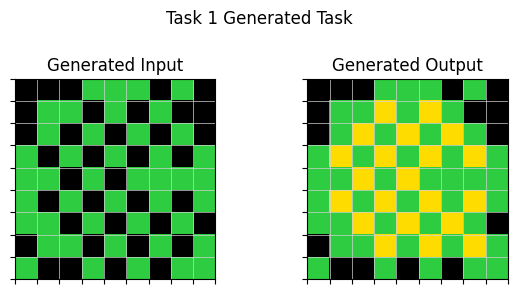

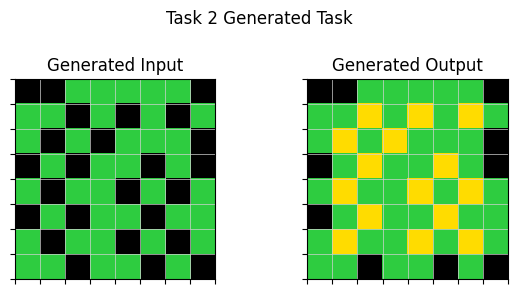

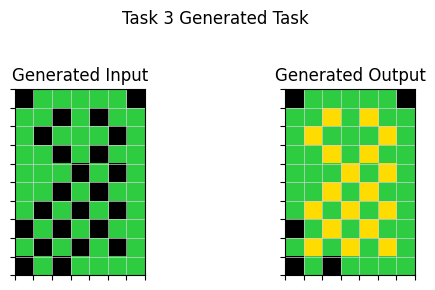

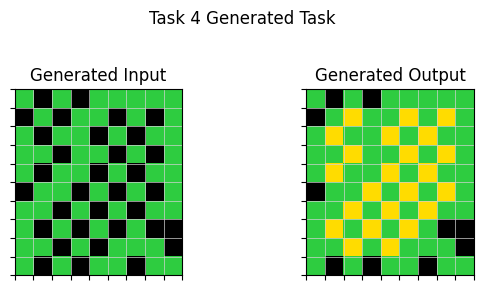

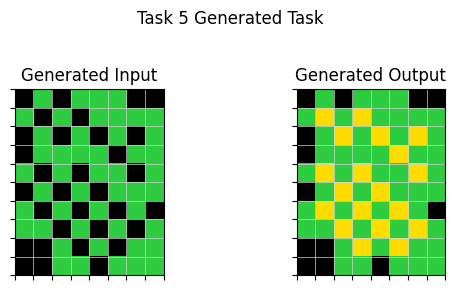

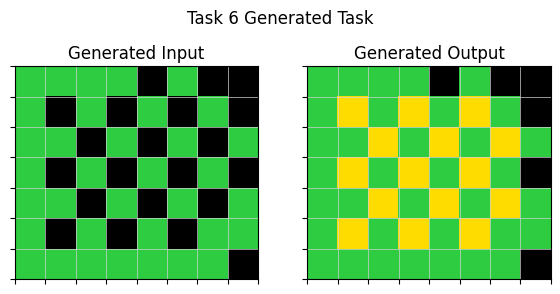

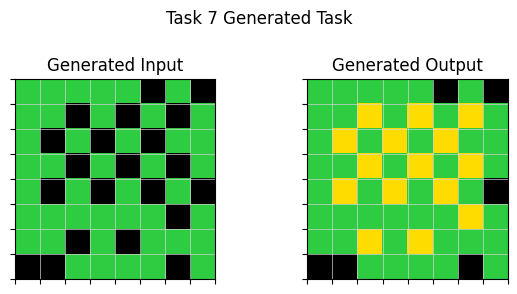

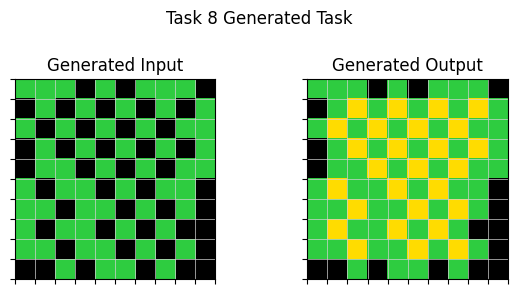

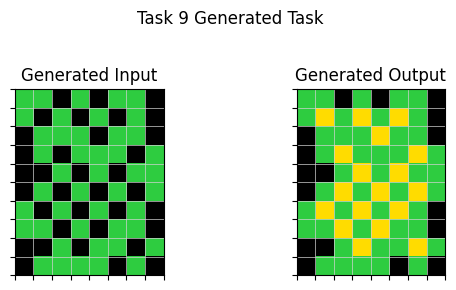

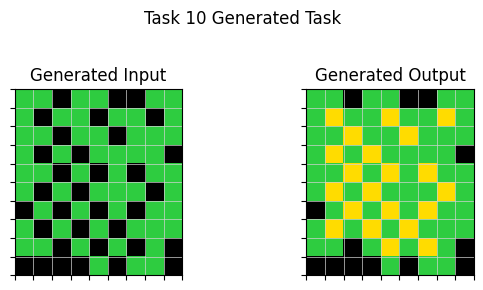

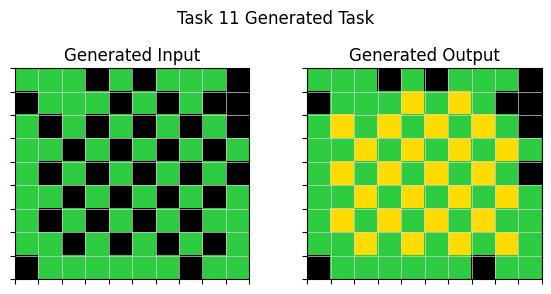

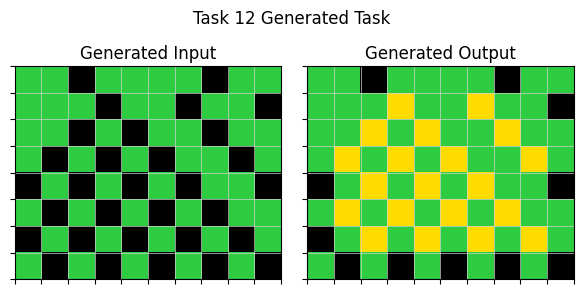

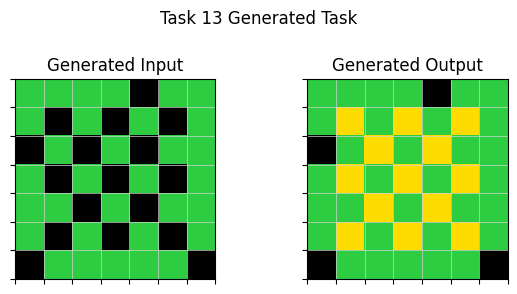

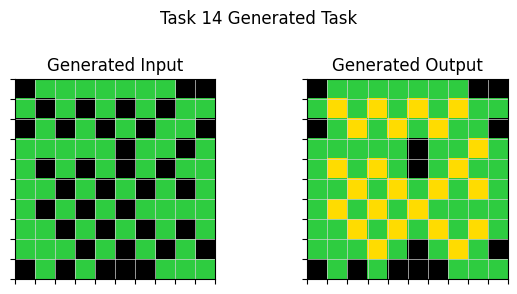

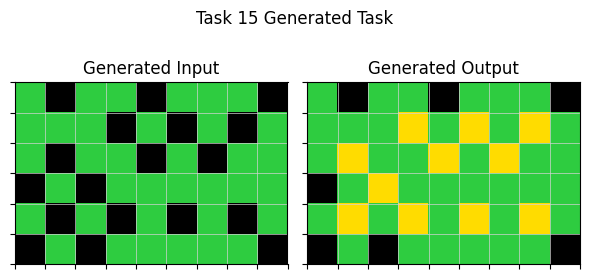

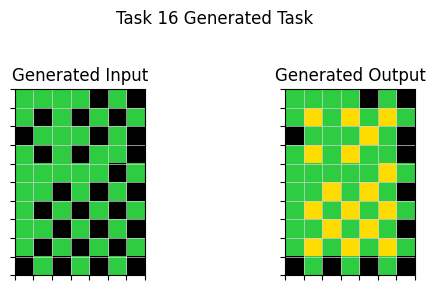

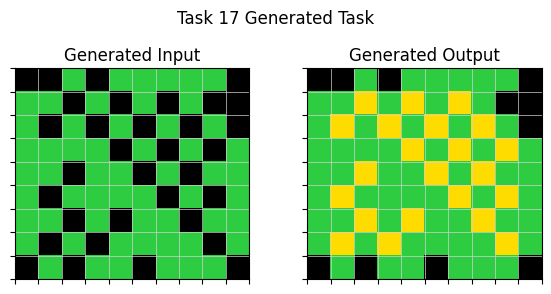

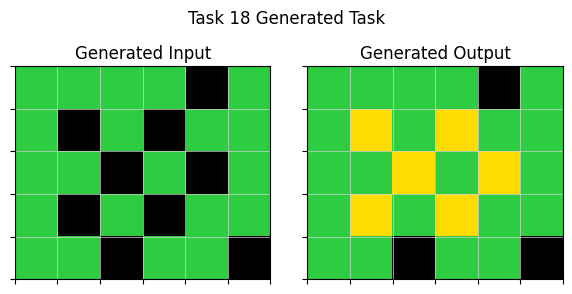

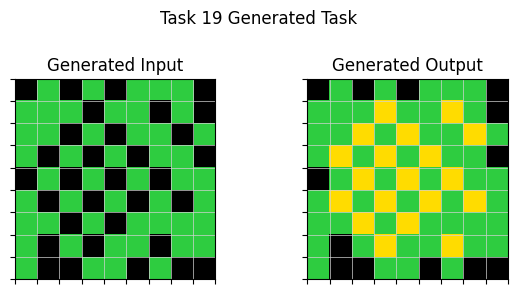

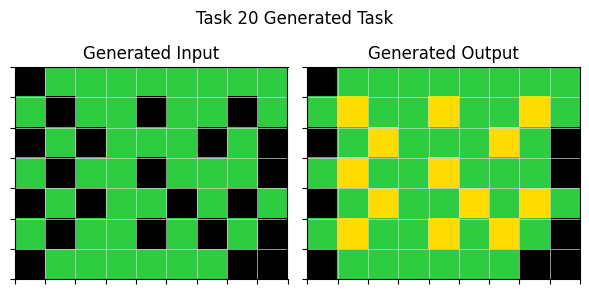

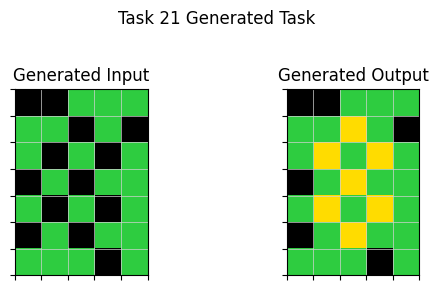

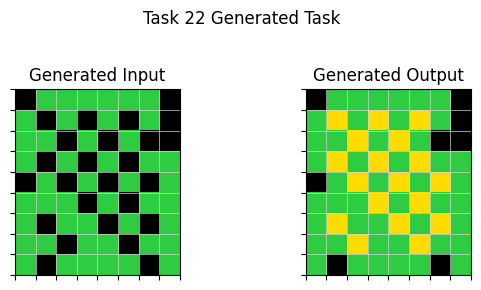

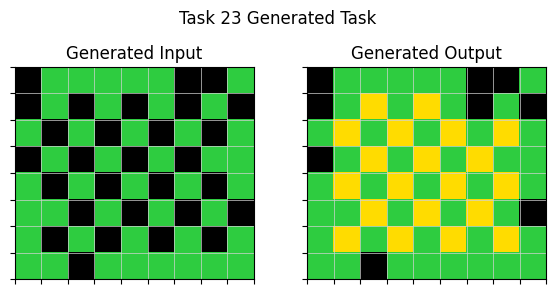

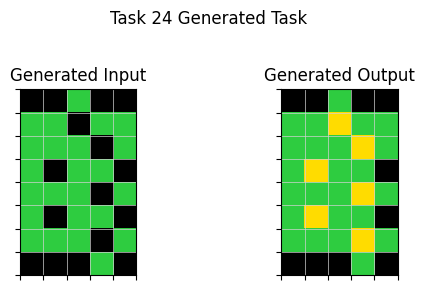

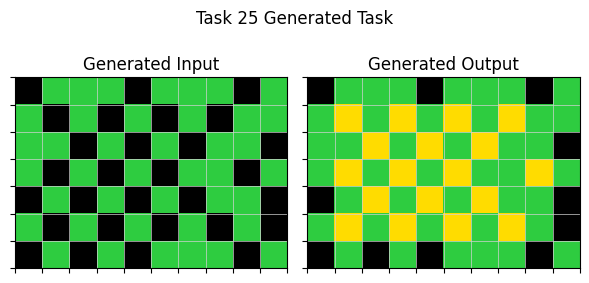

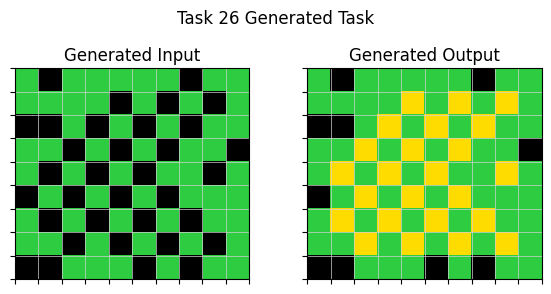

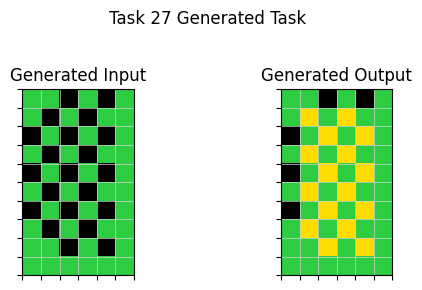

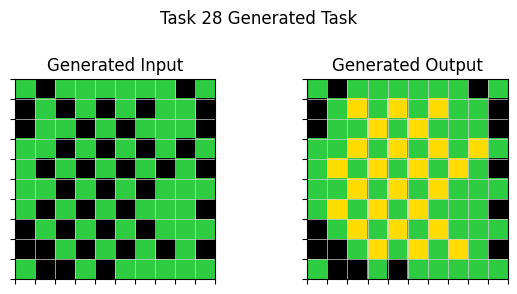

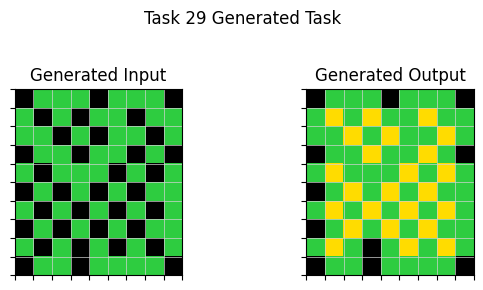

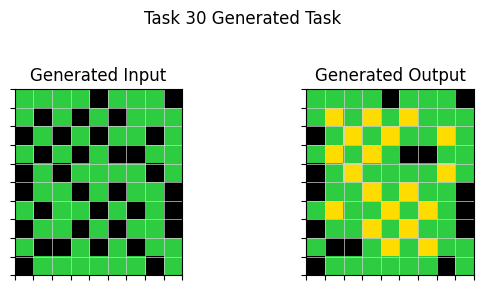

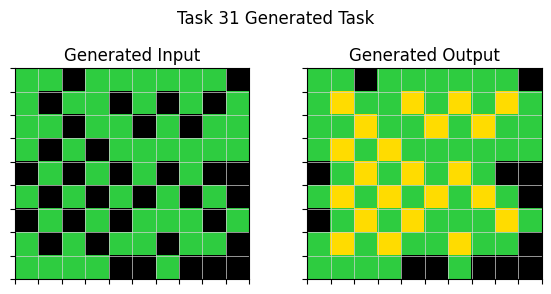

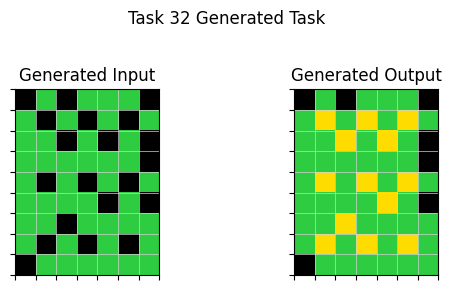

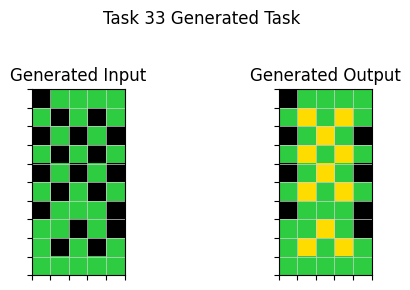

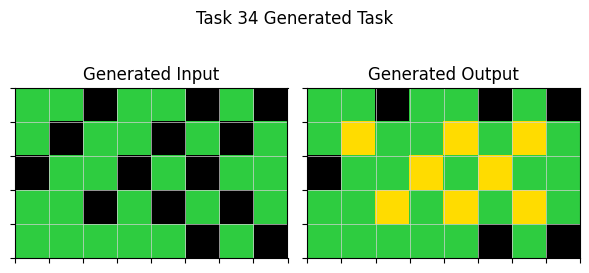

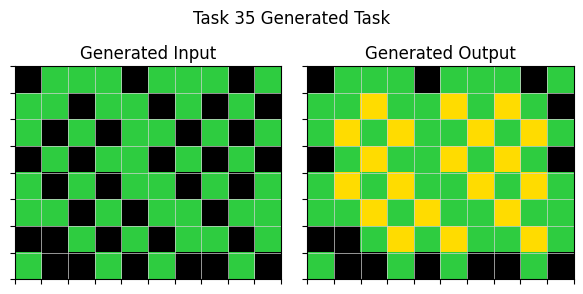

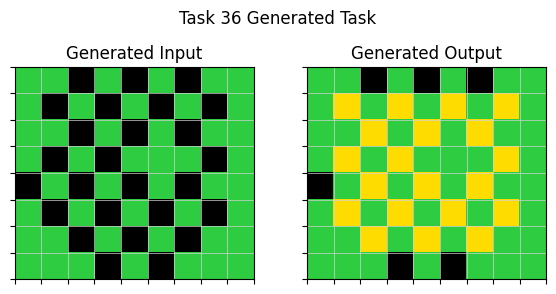

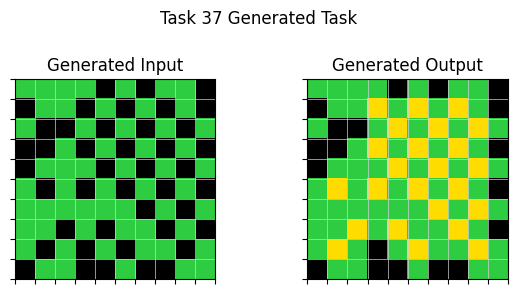

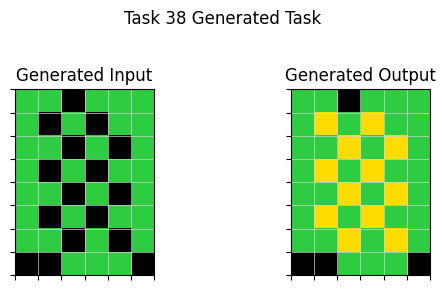

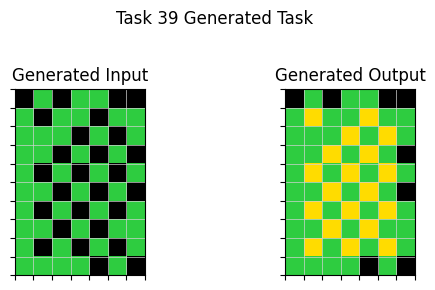

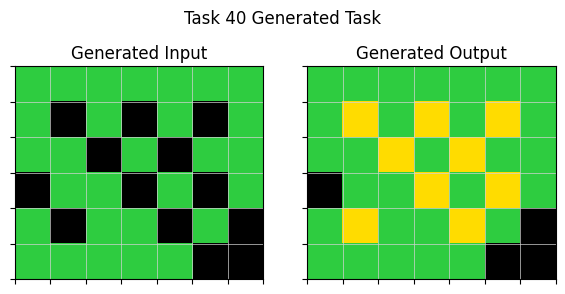

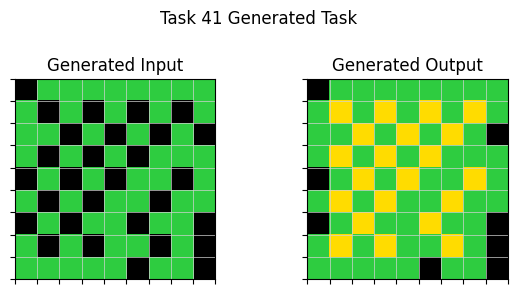

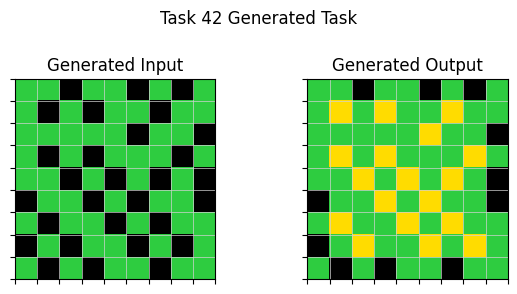

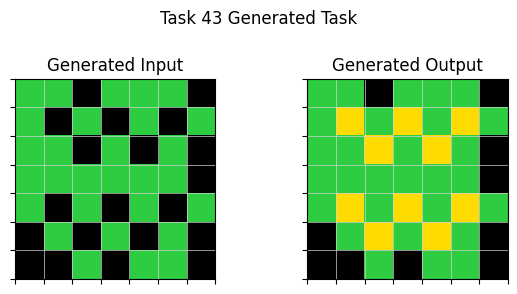

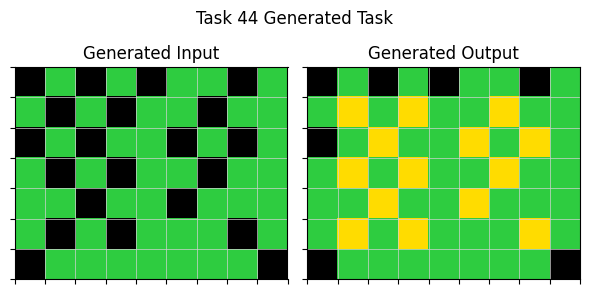

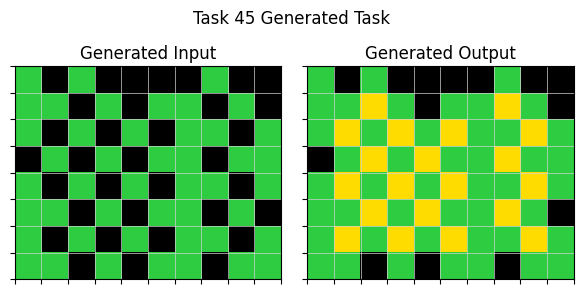

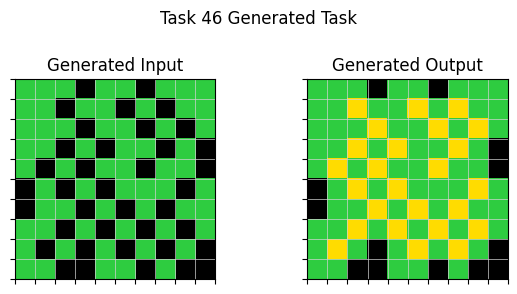

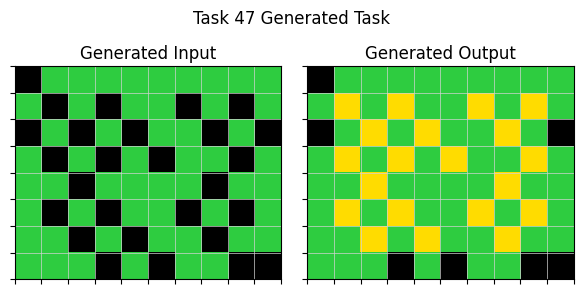

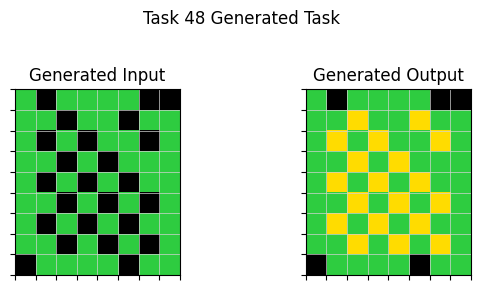

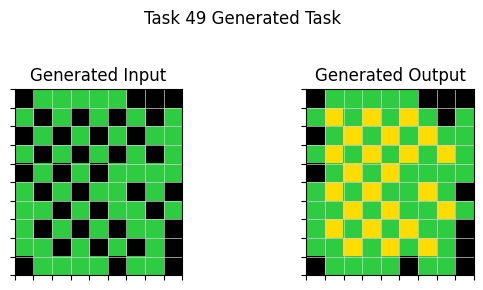

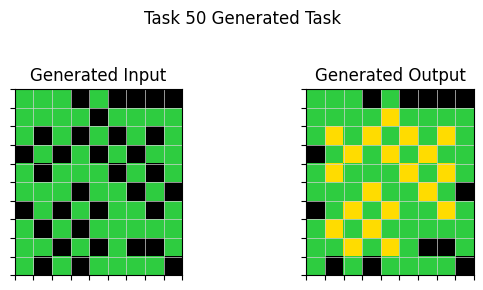

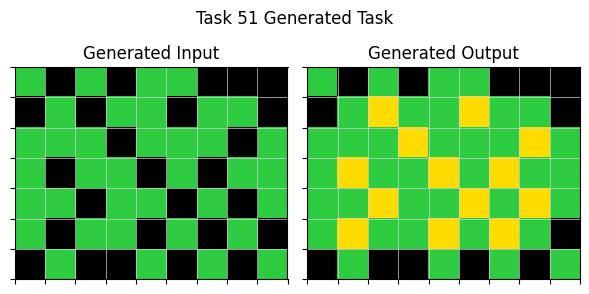

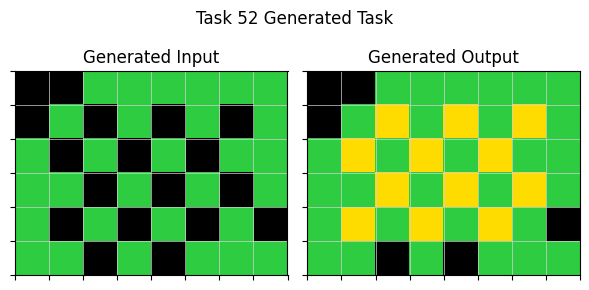

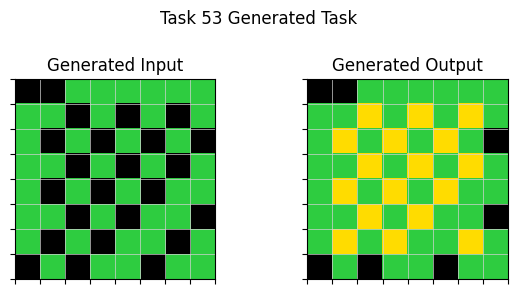

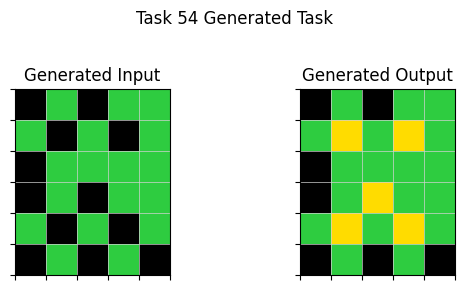

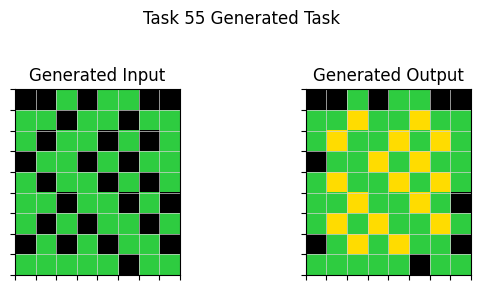

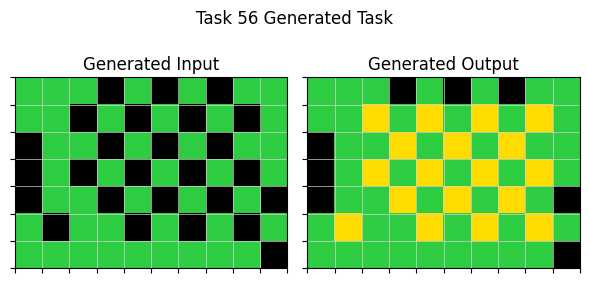

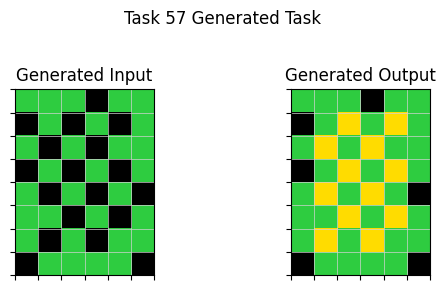

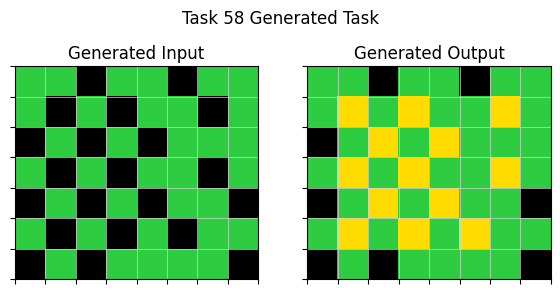

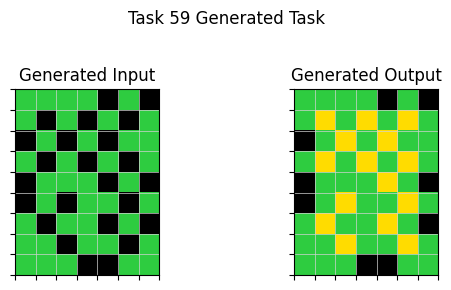

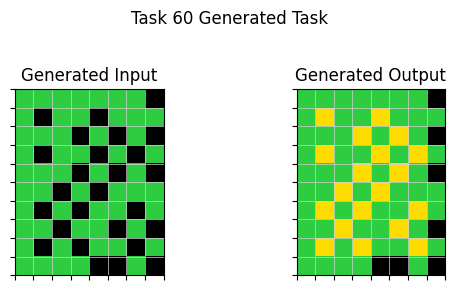

In [7]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Transformation functions (rotation, flipping, color changing)
def rotate_90(grid):
    return np.rot90(grid)

def flip_horizontal(grid):
    return np.fliplr(grid)

def flip_vertical(grid):
    return np.flipud(grid)

def change_color(grid, old_color, new_color):
    new_grid = copy.deepcopy(grid)
    new_grid[grid == old_color] = new_color
    return new_grid

# Function to apply fill rule: turn black pixels surrounded by green into yellow
def apply_fill_rule(input_grid):
    output_grid = copy.deepcopy(input_grid)
    rows, cols = input_grid.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if input_grid[i, j] == 0:  # Black pixel
                # Check if surrounded by green pixels
                if input_grid[i - 1, j] == 3 and input_grid[i + 1, j] == 3 and \
                   input_grid[i, j - 1] == 3 and input_grid[i, j + 1] == 3:
                    output_grid[i, j] = 4  # Fill with yellow
    return output_grid

# Genetic Algorithm Functions
def apply_transformation(grid, transformations):
    transformed_grid = copy.deepcopy(grid)
    for transformation in transformations:
        if transformation == 'rotate_90':
            transformed_grid = rotate_90(transformed_grid)
        elif transformation == 'flip_horizontal':
            transformed_grid = flip_horizontal(transformed_grid)
        elif transformation == 'flip_vertical':
            transformed_grid = flip_vertical(transformed_grid)
    return transformed_grid

# Generate the initial population of grids with random grid sizes
def generate_initial_population(num_individuals=10, min_size=5, max_size=10):
    population = []
    for _ in range(num_individuals):
        rows = random.randint(min_size, max_size)
        cols = random.randint(min_size, max_size)
        individual = {
            'input_grid': np.random.choice([0, 3], size=(rows, cols), p=[0.7, 0.3])  # Mostly black, some green
        }
        # Ensure each grid follows the fill rule
        individual['output_grid'] = apply_fill_rule(individual['input_grid'])
        population.append(individual)
    return population

# Updated fitness function to encourage filling more pixels
def fitness(individual):
    input_grid = individual['input_grid']
    expected_output = apply_fill_rule(input_grid)
    
    # Count the number of pixels that were correctly filled
    correctly_filled_pixels = np.sum((individual['output_grid'] == expected_output) & (expected_output == 4))
    
    # Add a bonus for each correctly filled pixel to encourage more filling
    fitness_score = correctly_filled_pixels * 10  # Bonus for correct fills
    
    return fitness_score

# Select best individuals based on fitness
def select_best_individuals(population, num_best=5):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:num_best]

# Crossover function to combine two parent grids
def crossover(parent1, parent2):
    rows1, cols1 = parent1['input_grid'].shape
    rows2, cols2 = parent2['input_grid'].shape
    
    # Crossover only if parents have the same grid size
    if rows1 == rows2 and cols1 == cols2:
        child_input = parent1['input_grid'].copy()
        crossover_point = random.randint(1, rows1 - 2)
        child_input[crossover_point:, :] = parent2['input_grid'][crossover_point:, :]
        child_output = apply_fill_rule(child_input)
        return {'input_grid': child_input, 'output_grid': child_output}
    else:
        return random.choice([parent1, parent2])  # If sizes don't match, pick one parent

# Mutate the grid by randomly changing some pixels
def mutate(individual, mutation_rate=0.1):
    grid = individual['input_grid']
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if random.random() < mutation_rate:
                grid[i, j] = random.choice([0, 3])  # Change between black and green
    individual['output_grid'] = apply_fill_rule(grid)
    return individual

# Main Genetic Algorithm Loop
def genetic_algorithm(num_generations=50, population_size=10, min_size=5, max_size=10):
    population = generate_initial_population(population_size, min_size, max_size)
    for generation in range(num_generations):
        best_individuals = select_best_individuals(population)
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(best_individuals, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
    return select_best_individuals(population, num_best=1)[0]

# Visualization functions
def plot_one(ax, matrix, title):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)
    ax.set_xticks([x - 0.5 for x in range(1 + len(matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

def plot_task(input_task, output_task, task_number):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(f'{task_number} Generated Task')
    plot_one(axs[0], input_task, 'Generated Input')
    plot_one(axs[1], output_task, 'Generated Output')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generate 20 new tasks with diverse grid sizes and visualize them
new_tasks = []
for i in range(60):  # Change this from 10 to 20
    best_individual = genetic_algorithm(num_generations=50, population_size=60, min_size=5, max_size=10)
    generated_input = best_individual['input_grid']
    generated_output = best_individual['output_grid']
    plot_task(generated_input, generated_output, f"Task {i + 1}")
    new_tasks.append((generated_input, generated_output))
